<a href="https://colab.research.google.com/github/Asif1310/3001/blob/main/Web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary modules
import requests #used to send HTTP request 
from bs4 import BeautifulSoup #used to parse the response recieved from web server
import re #to work with regular expressions
import numpy as np #array processing
import pandas as pd #dataframes

In [ ]:

url = "https://fbref.com/en/comps/12/La-Liga-Stats" #storing url in a variable
response = requests.get(url) #sending HTTP request
res = response.text

soup = BeautifulSoup(res)









    



In [ ]:
#initialize two empty lists 
data = []
data1 = []

#define a function which can be reused to get other tables in the webpage by passing relevant id information

def get_data(id):
  
  rows = soup.find_all("table", attrs = {'id':id}) #find and store the table information with specified id
  for i in rows:
    tag = i
  c = tag.find_all("th") #find and store all data corresponding to 'th' tag
  for el in c:
    d = str(el)
    f = re.sub("<.*?>"," ",d) #we are trying to extract only the required text by replacing the unnecessary info with blank string using regex pattern
    data.append(f)
  for i in rows:
    tag = i
  c = tag.find_all("td")
  for el in c:
    d = str(el)
    f = re.sub("<.*?>"," ",d)
    data1.append(f)
  return data, data1 #data contains table headers info, data1 contains table body info
  
get_data('results111741_overall') 



([' Rk ',
  ' Squad ',
  ' MP ',
  ' W ',
  ' D ',
  ' L ',
  ' GF ',
  ' GA ',
  ' GD ',
  ' Pts ',
  ' xG ',
  ' xGA ',
  ' xGD ',
  ' xGD/90 ',
  ' Last 5 ',
  ' Attendance ',
  ' Top Team Scorer ',
  ' Goalkeeper ',
  ' Notes ',
  ' 1 ',
  ' 2 ',
  ' 3 ',
  ' 4 ',
  ' 5 ',
  ' 6 ',
  ' 7 ',
  ' 8 ',
  ' 9 ',
  ' 10 ',
  ' 11 ',
  ' 12 ',
  ' 13 ',
  ' 14 ',
  ' 15 ',
  ' 16 ',
  ' 17 ',
  ' 18 ',
  ' 19 ',
  ' 20 '],
 ['    Real Madrid  ',
  ' 19 ',
  ' 14 ',
  ' 4 ',
  ' 1 ',
  ' 41 ',
  ' 16 ',
  ' +25 ',
  ' 46 ',
  ' 32.5 ',
  ' 21.5 ',
  ' +11.0 ',
  ' +0.58 ',
  '    W     W     W     D     W    ',
  ' 34,633 ',
  '  Karim Benzema  -  15  ',
  '  Thibaut Courtois  ',
  '  ',
  '    Sevilla  ',
  ' 18 ',
  ' 11 ',
  ' 5 ',
  ' 2 ',
  ' 29 ',
  ' 13 ',
  ' +16 ',
  ' 38 ',
  ' 21.1 ',
  ' 18.8 ',
  ' +2.3 ',
  ' +0.13 ',
  '    L     W     W     W     D    ',
  ' 25,909 ',
  '  Rafa Mir  -  5  ',
  '  Yassine Bounou  ',
  '  ',
  '    Betis  ',
  ' 18 ',
  ' 10 ',
  ' 3 ',
  ' 

In [ ]:
print(len(data1))

360


In [ ]:
arr = np.array(data1) #converting the table body data from python list to numpy array
arr1 = np.reshape(arr, (-1,18)) #reshaping the one-d array into two dimensions by specifying the columns number as 18


In [ ]:
datacol = data[1:19] #slicing the table headers column to remove the values that are not required
datacol1 = []
for i in datacol:
  i = i.strip()
  datacol1.append(i)

print(datacol1)

['Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes']


In [ ]:
df = pd.DataFrame(arr1, columns = datacol1) #creating a dataframe with relevant headers and table body info
df.head(18)

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,W W W D W,"34,633",Karim Benzema - 15,Thibaut Courtois,
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,L W W W D,"25,909",Rafa Mir - 5,Yassine Bounou,
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,W W W W L,"38,060",Juanmi - 11,Rui Silva,
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,W D W L W,"6,553","Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,W L L L L,"45,287",Luis Suárez - 7,Jan Oblak,
5,Real Sociedad,18,8,5,5,20,20,0,29,23.5,19.4,+4.1,+0.23,D L L L L,"25,009",Mikel Oyarzabal - 6,Álex Remiro,
6,Barcelona,18,7,7,4,29,22,+7,28,30.7,17.5,+13.2,+0.73,W L D W D,"46,299",Memphis Depay - 8,Marc-André ter Stegen,
7,Valencia,18,7,7,4,30,26,+4,28,22.4,20.0,+2.4,+0.13,D D W W W,"24,517",Carlos Soler - 7,Jasper Cillessen,
8,Villarreal,18,6,7,5,26,20,+6,25,29.4,21.6,+7.9,+0.44,L L W W W,"13,114",Gerard Moreno - 6,Gerónimo Rulli,
9,Athletic Club,19,5,9,5,17,16,+1,24,26.3,18.2,+8.0,+0.42,L D L W L,"29,525",Iñaki Williams - 5,Unai Simón,


In [ ]:
df.describe()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,20,2,12,7,10,12,11,19,14,19,19,19,19,20,20,20,20,1
top,Betis,18,5,5,5,29,22,+7,15,23.5,20.0,+11.0,+0.13,W L D W D,"8,764",Rafa Mir - 5,Yassine Bounou,
freq,1,18,4,5,5,3,4,2,3,2,2,2,2,1,1,1,1,20


'Last 5' column doesn't make sense as it is, instead it can be used to compute a new parameter called 'Form'. Form is a very ill-defined attribute with no exact definition, but we will try to describe form as below:

First we will split the string of Last 5 into individual elements and replace each with its corresponding points per game attribute, i.e. 3 points for W, 1 point for D and 0 points for L. Then we will do a weighted sum of all these five values, we will consider weights in below order for five matches:

1, 1.5, 2, 2.5, 3

Hence a team that has won recent matches will have a high score on form attribute compared to a team that lost recent matches.

In [ ]:
form_df = df['Last 5'].str.split(" ",0,expand = False) #splitting Last 5 column into separate entities that include W,L or D values along with several blank strings 
form_df.head()

0    [, , , , W, , , , , W, , , , , W, , , , , D, ,...
1    [, , , , L, , , , , W, , , , , W, , , , , W, ,...
2    [, , , , W, , , , , W, , , , , W, , , , , W, ,...
3    [, , , , W, , , , , D, , , , , W, , , , , L, ,...
4    [, , , , W, , , , , L, , , , , L, , , , , L, ,...
Name: Last 5, dtype: object

form_df is an object which has several lists with each list denoting last 5 games form of each club and this is not suited for our purpose because of the extra blank characters. Let us try to remove blank strings from each list

In [ ]:
fd1 = []
fd = []
for i in form_df: #iterating over lists in the object
  fd = [j for j in i if j] #removes the blank strings in each string
  fd1.append(fd)
print(fd1)


[['W', 'W', 'W', 'D', 'W'], ['L', 'W', 'W', 'W', 'D'], ['W', 'W', 'W', 'W', 'L'], ['W', 'D', 'W', 'L', 'W'], ['W', 'L', 'L', 'L', 'L'], ['D', 'L', 'L', 'L', 'L'], ['W', 'L', 'D', 'W', 'D'], ['D', 'D', 'W', 'W', 'W'], ['L', 'L', 'W', 'W', 'W'], ['L', 'D', 'L', 'W', 'L'], ['L', 'W', 'L', 'W', 'L'], ['D', 'W', 'D', 'W', 'W'], ['L', 'D', 'D', 'D', 'L'], ['D', 'W', 'L', 'D', 'W'], ['L', 'D', 'W', 'D', 'L'], ['W', 'D', 'D', 'D', 'W'], ['L', 'D', 'W', 'L', 'L'], ['L', 'L', 'D', 'L', 'L'], ['L', 'L', 'L', 'D', 'D'], ['D', 'L', 'D', 'L', 'L']]


Let us convert this into dataframe

In [ ]:
col1 = ['First','second','third','fourth','fifth'] #column header names
df_form = pd.DataFrame(fd1, columns = col1)
df_form.head()

,First,second,third,fourth,fifth
0,W,W,W,D,W
1,L,W,W,W,D
2,W,W,W,W,L
3,W,D,W,L,W
4,W,L,L,L,L


Now let us change the values into numerics as discussed previously

In [ ]:
def conv_fun(x): #defining a function to generalize the conversion to numerics.
  if x == 'W':
    x = 3
  elif x == 'D':
    x = 1
  else:
    x = 0
  return x
for col in df_form:
  df_form[col] = df_form[col].apply(conv_fun) #applying the function 
df_form.head()

,First,second,third,fourth,fifth
0,3,3,3,1,3
1,0,3,3,3,1
2,3,3,3,3,0
3,3,1,3,0,3
4,3,0,0,0,0


Now let us compute form and store it in a new column of original dataframe 'df'

In [ ]:
df['Form'] = df_form['First'] + (1.5 * df_form['second']) + (2 * df_form['third']) + (2.5 * df_form['fourth']) + (3* df_form['fifth'])
df.head(10)

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,Form
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,W W W D W,"34,633",Karim Benzema - 15,Thibaut Courtois,,25.0
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,L W W W D,"25,909",Rafa Mir - 5,Yassine Bounou,,21.0
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,W W W W L,"38,060",Juanmi - 11,Rui Silva,,21.0
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,W D W L W,"6,553","Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,W L L L L,"45,287",Luis Suárez - 7,Jan Oblak,,3.0
5,Real Sociedad,18,8,5,5,20,20,0,29,23.5,19.4,+4.1,+0.23,D L L L L,"25,009",Mikel Oyarzabal - 6,Álex Remiro,,1.0
6,Barcelona,18,7,7,4,29,22,+7,28,30.7,17.5,+13.2,+0.73,W L D W D,"46,299",Memphis Depay - 8,Marc-André ter Stegen,,15.5
7,Valencia,18,7,7,4,30,26,+4,28,22.4,20.0,+2.4,+0.13,D D W W W,"24,517",Carlos Soler - 7,Jasper Cillessen,,25.0
8,Villarreal,18,6,7,5,26,20,+6,25,29.4,21.6,+7.9,+0.44,L L W W W,"13,114",Gerard Moreno - 6,Gerónimo Rulli,,22.5
9,Athletic Club,19,5,9,5,17,16,+1,24,26.3,18.2,+8.0,+0.42,L D L W L,"29,525",Iñaki Williams - 5,Unai Simón,,9.0


Since we have Form attribute now, let us drop Last 5 colum from the dataframe

In [ ]:
df = df.drop('Last 5', axis = 1)
df.head(10)

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Form
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,"34,633",Karim Benzema - 15,Thibaut Courtois,,25.0
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,"25,909",Rafa Mir - 5,Yassine Bounou,,21.0
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,"38,060",Juanmi - 11,Rui Silva,,21.0
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,"6,553","Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,"45,287",Luis Suárez - 7,Jan Oblak,,3.0
5,Real Sociedad,18,8,5,5,20,20,0,29,23.5,19.4,+4.1,+0.23,"25,009",Mikel Oyarzabal - 6,Álex Remiro,,1.0
6,Barcelona,18,7,7,4,29,22,+7,28,30.7,17.5,+13.2,+0.73,"46,299",Memphis Depay - 8,Marc-André ter Stegen,,15.5
7,Valencia,18,7,7,4,30,26,+4,28,22.4,20.0,+2.4,+0.13,"24,517",Carlos Soler - 7,Jasper Cillessen,,25.0
8,Villarreal,18,6,7,5,26,20,+6,25,29.4,21.6,+7.9,+0.44,"13,114",Gerard Moreno - 6,Gerónimo Rulli,,22.5
9,Athletic Club,19,5,9,5,17,16,+1,24,26.3,18.2,+8.0,+0.42,"29,525",Iñaki Williams - 5,Unai Simón,,9.0


In [ ]:
df['Squad'] = df['Squad'].str.strip() #remove extra spaces in Squad column
df.head(10)

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Form
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,"34,633",Karim Benzema - 15,Thibaut Courtois,,25.0
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,"25,909",Rafa Mir - 5,Yassine Bounou,,21.0
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,"38,060",Juanmi - 11,Rui Silva,,21.0
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,"6,553","Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,"45,287",Luis Suárez - 7,Jan Oblak,,3.0
5,Real Sociedad,18,8,5,5,20,20,0,29,23.5,19.4,+4.1,+0.23,"25,009",Mikel Oyarzabal - 6,Álex Remiro,,1.0
6,Barcelona,18,7,7,4,29,22,+7,28,30.7,17.5,+13.2,+0.73,"46,299",Memphis Depay - 8,Marc-André ter Stegen,,15.5
7,Valencia,18,7,7,4,30,26,+4,28,22.4,20.0,+2.4,+0.13,"24,517",Carlos Soler - 7,Jasper Cillessen,,25.0
8,Villarreal,18,6,7,5,26,20,+6,25,29.4,21.6,+7.9,+0.44,"13,114",Gerard Moreno - 6,Gerónimo Rulli,,22.5
9,Athletic Club,19,5,9,5,17,16,+1,24,26.3,18.2,+8.0,+0.42,"29,525",Iñaki Williams - 5,Unai Simón,,9.0


Attendance depends on a stadium's seating capacity too in addition to a team's form. Hence, it makes sense to see percentage of seats filled instead of attendance count numeric. Let us try to scrape data from web

In [ ]:
tb = pd.read_html('https://en.wikipedia.org/wiki/List_of_stadiums_in_Spain')
tb[0].head() #[0] specifies that we need the first table in web page





,Image,Stadium,Capacity,City,Autonomous community,Team,Inaugurated,Notes
0,NaN,Camp Nou,"99,354[1]",Barcelona,Catalonia,Barcelona,1957,UEFA Category 4 stadium
1,NaN,Santiago Bernabéu,"81,044[2]",Madrid,Madrid,Real Madrid,1947,UEFA Category 4 stadium
2,NaN,Metropolitano Stadium,"68,456[3]",Madrid,Madrid,Atlético Madrid,2017,UEFA Category 4 stadium
3,NaN,Benito Villamarín,"60,721[4]",Seville,Andalusia,Real Betis,1929,NaN
4,NaN,Lluís Companys,60713,Barcelona,Catalonia,FC Penger,1927,UEFA Category 4 stadium


In [ ]:
tb[0]['Team'].unique()

array(['Barcelona', 'Real Madrid', 'Atlético Madrid', 'Real Betis',
       'FC Penger', 'None', 'Athletic Bilbao', 'Valencia', 'Sevilla',
       'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'Las Palmas', 'Murcia', 'Oviedo', 'Málaga',
       'Hércules', 'Sporting Gijón', 'Celta Vigo', 'Valladolid',
       'Levante', 'Cádiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing Santander', 'Recreativo', 'Almería', 'Córdoba',
       'Xerez', 'Alavés', 'Granada', 'Albacete', 'Getafe', 'Salamanca CF',
       'Linense', 'UD LogroñésLogroño', 'Badajoz', 'Cartagena', 'Mérida',
       'Gimnàstic', 'Rayo Vallecano', 'Castellón', 'Móstoles',
       'Lleida Esportiu', 'Almería (rugby)', 'Girona', 'Cultural Leonesa',
       'BurgosReal Burgos', 'Jaén', 'Leganés', 'Cisneros (rugby)',
       'Racing Ferrol', 'Compostela', 'Sabadell', 'Extremadura',
       'Terrassa', 'Tudelano', 'Athletics', 'Pontevedra', 'Melilla',
       'Linares',
       'Gijón Mariner

In [ ]:
#our main data frame has team name as 'Betis', where as wikipedia table has this team listed as 'Real Betis'
def conv_betis(x): #defining a function rename Real Betis as Betis in the wiki data frame
  if x == 'Real Betis':
    x = 'Betis'
  return x
tb[0]['Team'] = tb[0]['Team'].apply(conv_betis)
tb[0]['Team'].unique()


array(['Barcelona', 'Real Madrid', 'Atlético Madrid', 'Betis',
       'FC Penger', 'None', 'Athletic Bilbao', 'Valencia', 'Sevilla',
       'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'Las Palmas', 'Murcia', 'Oviedo', 'Málaga',
       'Hércules', 'Sporting Gijón', 'Celta Vigo', 'Valladolid',
       'Levante', 'Cádiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing Santander', 'Recreativo', 'Almería', 'Córdoba',
       'Xerez', 'Alavés', 'Granada', 'Albacete', 'Getafe', 'Salamanca CF',
       'Linense', 'UD LogroñésLogroño', 'Badajoz', 'Cartagena', 'Mérida',
       'Gimnàstic', 'Rayo Vallecano', 'Castellón', 'Móstoles',
       'Lleida Esportiu', 'Almería (rugby)', 'Girona', 'Cultural Leonesa',
       'BurgosReal Burgos', 'Jaén', 'Leganés', 'Cisneros (rugby)',
       'Racing Ferrol', 'Compostela', 'Sabadell', 'Extremadura',
       'Terrassa', 'Tudelano', 'Athletics', 'Pontevedra', 'Melilla',
       'Linares',
       'Gijón Mariners (Am

In [ ]:
tb[0]['Team'] = tb[0]['Team'].str.strip()

In [ ]:
df_upd = pd.DataFrame()
df_upd['Squad'] = tb[0]['Team']
df_upd['Capacity'] = tb[0]['Capacity']
df_upd.head()

,Squad,Capacity
0,Barcelona,"99,354[1]"
1,Real Madrid,"81,044[2]"
2,Atlético Madrid,"68,456[3]"
3,Betis,"60,721[4]"
4,FC Penger,60713


In [ ]:
df_upd['Capacity'] = df_upd['Capacity'].str.replace(r'\[.*?\]','') #replacing special characters in capacity column data
df_upd.head()

,Squad,Capacity
0,Barcelona,"99,354"
1,Real Madrid,"81,044"
2,Atlético Madrid,"68,456"
3,Betis,"60,721"
4,FC Penger,60713


In [ ]:
df_upd['Capacity'] = df_upd['Capacity'].str.replace(',','')
df_upd.head()

,Squad,Capacity
0,Barcelona,99354
1,Real Madrid,81044
2,Atlético Madrid,68456
3,Betis,60721
4,FC Penger,60713


In [ ]:
df_upd['Capacity'] = df_upd['Capacity'].astype(int) #converting capacity into an integer
df_upd.head()

,Squad,Capacity
0,Barcelona,99354
1,Real Madrid,81044
2,Atlético Madrid,68456
3,Betis,60721
4,FC Penger,60713


Let us try to merge the main dataframe with the new one so that we can get the stadium capacity in new column, later attendance percentage can be calculated. 

In [ ]:
df2 = pd.DataFrame.merge(df,df_upd, on = 'Squad', how = 'inner')
df2.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Form,Capacity
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,"34,633",Karim Benzema - 15,Thibaut Courtois,,25.0,81044
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,"25,909",Rafa Mir - 5,Yassine Bounou,,21.0,43883
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,"38,060",Juanmi - 11,Rui Silva,,21.0,60721
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,"6,553","Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5,14505
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,"45,287",Luis Suárez - 7,Jan Oblak,,3.0,68456


In [ ]:
df2['Attendance'] = df2['Attendance'].str.replace(',','')
df2['Attendance'] = df2['Attendance'].astype(int)
df2.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Form,Capacity
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,34633,Karim Benzema - 15,Thibaut Courtois,,25.0,81044
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,25909,Rafa Mir - 5,Yassine Bounou,,21.0,43883
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,38060,Juanmi - 11,Rui Silva,,21.0,60721
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,6553,"Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5,14505
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,45287,Luis Suárez - 7,Jan Oblak,,3.0,68456


In [ ]:
df2['Attendance percent'] = (df2['Attendance']/df2['Capacity'])*100
df2.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Form,Capacity,Attendance percent
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,34633,Karim Benzema - 15,Thibaut Courtois,,25.0,81044,42.733577
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,25909,Rafa Mir - 5,Yassine Bounou,,21.0,43883,59.041087
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,38060,Juanmi - 11,Rui Silva,,21.0,60721,62.680127
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,6553,"Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5,14505,45.177525
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,45287,Luis Suárez - 7,Jan Oblak,,3.0,68456,66.154902


Top Team Scorer can be split into scorer name and the goals scored to have a more meaningful data feature.

In [ ]:
top_sc = df2['Top Team Scorer'].str.split('-',expand = False)
print(top_sc)

0                      [  Karim Benzema  ,   15  ]
1                            [  Rafa Mir  ,   5  ]
2                             [  Juanmi  ,   11  ]
3     [  Radamel Falcao ,  Álvaro García  ,   5  ]
4                         [  Luis Suárez  ,   7  ]
5                     [  Mikel Oyarzabal  ,   6  ]
6                       [  Memphis Depay  ,   8  ]
7                        [  Carlos Soler  ,   7  ]
8                       [  Gerard Moreno  ,   6  ]
9                       [  Raúl de Tomás  ,   8  ]
10                       [  Jorge Molina  ,   7  ]
11     [  Ezequiel Ávila ,  David García  ,   3  ]
12                         [  Iago Aspas  ,   8  ]
13                     [  Dani Rodríguez  ,   3  ]
14                          [  Enes Ünal  ,   5  ]
15                         [  Lucas Boyé  ,   5  ]
16                             [  Joselu  ,   9  ]
17                     [  Anthony Lozano  ,   5  ]
18                  [  José Luis Morales  ,   5  ]
Name: Top Team Scorer, dtype: o

In [ ]:
list2 = []
for i in top_sc:
  list1 = i[1] #extracting only the goals scored into new list
  list2.append(list1)
print(list2)
print(type(list2))

['  15  ', '  5  ', '  11  ', '  5  ', '  7  ', '  6  ', '  8  ', '  7  ', '  6  ', '  8  ', '  7  ', '  3  ', '  8  ', '  3  ', '  5  ', '  5  ', '  9  ', '  5  ', '  5  ']
<class 'list'>


In [ ]:
df2['gsts'] = pd.Series(list2) #gsts - goals scored by top scorer
df2.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Form,Capacity,Attendance percent,gsts
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,34633,Karim Benzema - 15,Thibaut Courtois,,25.0,81044,42.733577,15
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,25909,Rafa Mir - 5,Yassine Bounou,,21.0,43883,59.041087,5
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,38060,Juanmi - 11,Rui Silva,,21.0,60721,62.680127,11
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,6553,"Radamel Falcao , Álvaro García - 5",Stole Dimitrievski,,19.5,14505,45.177525,5
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,45287,Luis Suárez - 7,Jan Oblak,,3.0,68456,66.154902,7


In [ ]:
df2['gsts'] = df2['gsts'].str.strip()
df2 = df2.drop(['Top Team Scorer', 'Goalkeeper', 'Notes', 'Attendance', 'Capacity'], axis = 1 )
df2.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Form,Attendance percent,gsts
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,25.0,42.733577,15
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,21.0,59.041087,5
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,21.0,62.680127,11
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,19.5,45.177525,5
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,3.0,66.154902,7


Let us try to scrape data from the second table on web page which has some useful stats

In [ ]:
data = []
data1 = []
get_data('stats_squads_standard_for') #using get_data function again with id for second table
print(len(data1))

560


In [ ]:
print(data1)

[' 25 ', ' 28.1 ', ' 43.4 ', ' 18 ', ' 198 ', ' 1,620 ', ' 18.0 ', ' 14 ', ' 8 ', ' 10 ', ' 4 ', ' 4 ', ' 43 ', ' 2 ', ' 0.78 ', ' 0.44 ', ' 1.22 ', ' 0.56 ', ' 1.00 ', ' 17.9 ', ' 14.9 ', ' 9.6 ', ' 24.6 ', ' 1.00 ', ' 0.54 ', ' 1.53 ', ' 0.83 ', ' 1.36 ', ' 23 ', ' 27.3 ', ' 49.2 ', ' 19 ', ' 209 ', ' 1,710 ', ' 19.0 ', ' 15 ', ' 13 ', ' 14 ', ' 1 ', ' 3 ', ' 36 ', ' 2 ', ' 0.79 ', ' 0.68 ', ' 1.47 ', ' 0.74 ', ' 1.42 ', ' 26.3 ', ' 24.0 ', ' 18.1 ', ' 42.1 ', ' 1.38 ', ' 0.95 ', ' 2.34 ', ' 1.26 ', ' 2.22 ', ' 22 ', ' 28.7 ', ' 53.7 ', ' 18 ', ' 198 ', ' 1,620 ', ' 18.0 ', ' 27 ', ' 22 ', ' 26 ', ' 1 ', ' 1 ', ' 49 ', ' 2 ', ' 1.50 ', ' 1.22 ', ' 2.72 ', ' 1.44 ', ' 2.67 ', ' 24.7 ', ' 23.9 ', ' 18.1 ', ' 42.0 ', ' 1.37 ', ' 1.01 ', ' 2.38 ', ' 1.33 ', ' 2.34 ', ' 31 ', ' 26.4 ', ' 64.7 ', ' 18 ', ' 198 ', ' 1,620 ', ' 18.0 ', ' 29 ', ' 20 ', ' 25 ', ' 4 ', ' 5 ', ' 42 ', ' 2 ', ' 1.61 ', ' 1.11 ', ' 2.72 ', ' 1.39 ', ' 2.50 ', ' 30.7 ', ' 26.9 ', ' 20.9 ', ' 47.7 ', ' 1.70 ', ' 1.1

In [ ]:
#data1 variable does not contain club names, hence let us try to extract this separately
data11 = []
nam = soup.find_all('table', attrs = {'id': 'stats_squads_standard_for' })
for i in nam:
  tag = i
d = tag.find_all('a') #club names are stored with 'a' tag on the web page, so we are searching for data in these tags.
for el in d:
  ele = str(el)
  g = re.sub('<.*?>','',ele)
  data11.append(g)
print(data11)

['Alavés', 'Athletic Club', 'Atlético Madrid', 'Barcelona', 'Betis', 'Cádiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe', 'Granada', 'Levante', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Villarreal']


data1 has table body data in a single dimension, we need to split it into two dimensions with 28 columns. data11 has team names which needs to be appended

In [ ]:
arr12 = np.array(data1)
arr13 = np.reshape(arr12, (-1,28))
print(arr13)

[[' 25 ' ' 28.1 ' ' 43.4 ' ' 18 ' ' 198 ' ' 1,620 ' ' 18.0 ' ' 14 ' ' 8 '
  ' 10 ' ' 4 ' ' 4 ' ' 43 ' ' 2 ' ' 0.78 ' ' 0.44 ' ' 1.22 ' ' 0.56 '
  ' 1.00 ' ' 17.9 ' ' 14.9 ' ' 9.6 ' ' 24.6 ' ' 1.00 ' ' 0.54 ' ' 1.53 '
  ' 0.83 ' ' 1.36 ']
 [' 23 ' ' 27.3 ' ' 49.2 ' ' 19 ' ' 209 ' ' 1,710 ' ' 19.0 ' ' 15 '
  ' 13 ' ' 14 ' ' 1 ' ' 3 ' ' 36 ' ' 2 ' ' 0.79 ' ' 0.68 ' ' 1.47 '
  ' 0.74 ' ' 1.42 ' ' 26.3 ' ' 24.0 ' ' 18.1 ' ' 42.1 ' ' 1.38 ' ' 0.95 '
  ' 2.34 ' ' 1.26 ' ' 2.22 ']
 [' 22 ' ' 28.7 ' ' 53.7 ' ' 18 ' ' 198 ' ' 1,620 ' ' 18.0 ' ' 27 '
  ' 22 ' ' 26 ' ' 1 ' ' 1 ' ' 49 ' ' 2 ' ' 1.50 ' ' 1.22 ' ' 2.72 '
  ' 1.44 ' ' 2.67 ' ' 24.7 ' ' 23.9 ' ' 18.1 ' ' 42.0 ' ' 1.37 ' ' 1.01 '
  ' 2.38 ' ' 1.33 ' ' 2.34 ']
 [' 31 ' ' 26.4 ' ' 64.7 ' ' 18 ' ' 198 ' ' 1,620 ' ' 18.0 ' ' 29 '
  ' 20 ' ' 25 ' ' 4 ' ' 5 ' ' 42 ' ' 2 ' ' 1.61 ' ' 1.11 ' ' 2.72 '
  ' 1.39 ' ' 2.50 ' ' 30.7 ' ' 26.9 ' ' 20.9 ' ' 47.7 ' ' 1.70 ' ' 1.16 '
  ' 2.86 ' ' 1.49 ' ' 2.65 ']
 [' 29 ' ' 29.1 ' ' 52.7 ' ' 18 ' ' 198 ' 

In [ ]:
df_2 = pd.DataFrame(arr13, columns = None) #create a dataframe for second table
df_2.head()
          

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,25,28.1,43.4,18,198,"1,620",18.0,14,8,10,4,4,43,2,0.78,0.44,1.22,0.56,1.00,17.9,14.9,9.6,24.6,1.00,0.54,1.53,0.83,1.36
1,23,27.3,49.2,19,209,"1,710",19.0,15,13,14,1,3,36,2,0.79,0.68,1.47,0.74,1.42,26.3,24.0,18.1,42.1,1.38,0.95,2.34,1.26,2.22
2,22,28.7,53.7,18,198,"1,620",18.0,27,22,26,1,1,49,2,1.50,1.22,2.72,1.44,2.67,24.7,23.9,18.1,42.0,1.37,1.01,2.38,1.33,2.34
3,31,26.4,64.7,18,198,"1,620",18.0,29,20,25,4,5,42,2,1.61,1.11,2.72,1.39,2.50,30.7,26.9,20.9,47.7,1.70,1.16,2.86,1.49,2.65
4,29,29.1,52.7,18,198,"1,620",18.0,31,23,28,3,3,42,3,1.72,1.28,3.00,1.56,2.83,27.4,25.1,18.3,43.4,1.52,1.02,2.54,1.39,2.41


In [ ]:
df_2['Squad'] = pd.Series(data11)
df_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,Squad
0,25,28.1,43.4,18,198,"1,620",18.0,14,8,10,4,4,43,2,0.78,0.44,1.22,0.56,1.00,17.9,14.9,9.6,24.6,1.00,0.54,1.53,0.83,1.36,Alavés
1,23,27.3,49.2,19,209,"1,710",19.0,15,13,14,1,3,36,2,0.79,0.68,1.47,0.74,1.42,26.3,24.0,18.1,42.1,1.38,0.95,2.34,1.26,2.22,Athletic Club
2,22,28.7,53.7,18,198,"1,620",18.0,27,22,26,1,1,49,2,1.50,1.22,2.72,1.44,2.67,24.7,23.9,18.1,42.0,1.37,1.01,2.38,1.33,2.34,Atlético Madrid
3,31,26.4,64.7,18,198,"1,620",18.0,29,20,25,4,5,42,2,1.61,1.11,2.72,1.39,2.50,30.7,26.9,20.9,47.7,1.70,1.16,2.86,1.49,2.65,Barcelona
4,29,29.1,52.7,18,198,"1,620",18.0,31,23,28,3,3,42,3,1.72,1.28,3.00,1.56,2.83,27.4,25.1,18.3,43.4,1.52,1.02,2.54,1.39,2.41,Betis


Now let us extract only the columns we need from this dataframe, below are the column numbers of dataframe we will require for further analysis:

0 - number of different players used so far;
1 - average age of the squad;
2 - possession percentage;
9 - non penalty goals (we have total goals scored in the main dataframe, non penatly goals can be a good measure of how efficient a team is from open play);
12 - number of yellow cards recieved by the squad;
13 - number of red cards recieved;
14 - Goals scored per 90 mins (just a ratio of total goals scored by number of matches);
23 - XG for 90 mins;
24 - XA for 90 mins

In [ ]:
df_upd = df_2.rename(columns = {0:'NDF', 1:'age', 2:'poss', 9 :'NPG', 12 :'YC', 13 :'RC', 14 :'GP90', 23 :'XG90', 24 :'XA90'})
df_upd.head()

,NDF,age,poss,3,4,5,6,7,8,NPG,10,11,YC,RC,GP90,15,16,17,18,19,20,21,22,XG90,XA90,25,26,27,Squad
0,25,28.1,43.4,18,198,"1,620",18.0,14,8,10,4,4,43,2,0.78,0.44,1.22,0.56,1.00,17.9,14.9,9.6,24.6,1.00,0.54,1.53,0.83,1.36,Alavés
1,23,27.3,49.2,19,209,"1,710",19.0,15,13,14,1,3,36,2,0.79,0.68,1.47,0.74,1.42,26.3,24.0,18.1,42.1,1.38,0.95,2.34,1.26,2.22,Athletic Club
2,22,28.7,53.7,18,198,"1,620",18.0,27,22,26,1,1,49,2,1.50,1.22,2.72,1.44,2.67,24.7,23.9,18.1,42.0,1.37,1.01,2.38,1.33,2.34,Atlético Madrid
3,31,26.4,64.7,18,198,"1,620",18.0,29,20,25,4,5,42,2,1.61,1.11,2.72,1.39,2.50,30.7,26.9,20.9,47.7,1.70,1.16,2.86,1.49,2.65,Barcelona
4,29,29.1,52.7,18,198,"1,620",18.0,31,23,28,3,3,42,3,1.72,1.28,3.00,1.56,2.83,27.4,25.1,18.3,43.4,1.52,1.02,2.54,1.39,2.41,Betis


In [ ]:
df_new = df_upd[['Squad','NDF','age','poss','NPG','YC','RC','GP90','XG90','XA90']]
df_new.head()

,Squad,NDF,age,poss,NPG,YC,RC,GP90,XG90,XA90
0,Alavés,25,28.1,43.4,10,43,2,0.78,1.00,0.54
1,Athletic Club,23,27.3,49.2,14,36,2,0.79,1.38,0.95
2,Atlético Madrid,22,28.7,53.7,26,49,2,1.50,1.37,1.01
3,Barcelona,31,26.4,64.7,25,42,2,1.61,1.70,1.16
4,Betis,29,29.1,52.7,28,42,3,1.72,1.52,1.02


Now let us merge this with original dataframe

In [ ]:
df3 = pd.DataFrame.merge(df2, df_new, on = 'Squad', how = 'inner')
df3.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Form,Attendance percent,gsts,NDF,age,poss,NPG,YC,RC,GP90,XG90,XA90
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,25.0,42.733577,15,27,28.2,59.7,40,32,0,2.16,1.71,1.28
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,21.0,59.041087,5,28,29.0,59.2,27,49,3,1.56,1.17,0.90
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,21.0,62.680127,11,29,29.1,52.7,28,42,3,1.72,1.52,1.02
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,19.5,45.177525,5,25,27.9,49.0,22,48,1,1.39,1.31,0.95
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,3.0,66.154902,7,22,28.7,53.7,26,49,2,1.50,1.37,1.01


There are still some important stats that can be useful for our analysis, they are as below:

From Squad goalkeeping table:
Save percentage
penalty save percentage

From squad shooting table:
shots on target percentage

from squad passing table:
pass completion percentage
progressive distance covered

from squad miscellaneous table:
Fouls committed
fouls drawn
aerial duels won
offsides

In [ ]:
#define a function to generalize table data extraction from the raw data
def get_table( id, col, data1):
  data11 = []
  nam = soup.find_all('table', attrs = {'id': id })
  for i in nam:
    tag = i
  d = tag.find_all('a')
  for el in d:
    ele = str(el)
    g = re.sub('<.*?>','',ele)
    data11.append(g)
  arr12 = np.array(data1)
  arr13 = np.reshape(arr12, (-1,col))
  df_fn = pd.DataFrame(arr13, columns = None)
  df_fn['Squad'] = pd.Series(data11)
  return df_fn
  

In [ ]:
data = []
data1 = []
get_data('stats_squads_keeper_for') #getting squad goalkeeping data from webpage
df_goal = get_table( 'stats_squads_keeper_for', 20, data1) #extract table data from the raw data
df_goal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Squad
0,2,18,18,"1,620",18.0,29,1.61,72,45,62.5,4,3,11,3,16.7,4,2,2,0,50.0,Alavés
1,2,19,19,"1,710",19.0,16,0.84,65,48,78.5,5,9,5,7,36.8,2,2,0,0,0.0,Athletic Club
2,1,18,18,"1,620",18.0,22,1.22,39,21,51.3,8,5,5,5,27.8,3,3,0,0,0.0,Atlético Madrid
3,2,18,18,"1,620",18.0,22,1.22,53,31,58.5,7,7,4,3,16.7,0,0,0,0,,Barcelona
4,2,18,18,"1,620",18.0,21,1.17,62,44,67.7,10,3,5,5,27.8,1,1,0,0,0.0,Betis


In [ ]:
df_goal = df_goal.rename(columns = {9 : 'Save per', 19 : 'Pen save per'})
df_goal_2 = df_goal[['Squad','Save per','Pen save per']]
df3 = pd.DataFrame.merge(df3, df_goal_2, on = 'Squad', how = 'inner')
df3.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Form,Attendance percent,gsts,NDF,age,poss,NPG,YC,RC,GP90,XG90,XA90,Save per,Pen save per
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,25.0,42.733577,15,27,28.2,59.7,40,32,0,2.16,1.71,1.28,75.8,0.0
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,21.0,59.041087,5,28,29.0,59.2,27,49,3,1.56,1.17,0.90,76.5,50.0
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,21.0,62.680127,11,29,29.1,52.7,28,42,3,1.72,1.52,1.02,67.7,0.0
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,19.5,45.177525,5,25,27.9,49.0,22,48,1,1.39,1.31,0.95,80.6,25.0
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,3.0,66.154902,7,22,28.7,53.7,26,49,2,1.50,1.37,1.01,51.3,0.0


In [ ]:
data = []
data1 = []
get_data('stats_squads_shooting_for') #getting squad shooting data from webpage
df_shoot = get_table( 'stats_squads_shooting_for', 19 , data1) #extract table data from the raw data
df_shoot.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Squad
0,25,18.0,14,173,49,28.3,9.61,2.72,0.06,0.20,16.4,5,4,4,17.9,14.9,0.09,-3.9,-4.9,Alavés
1,23,19.0,15,241,66,27.4,12.68,3.47,0.06,0.21,16.2,7,1,3,26.3,24.0,0.10,-11.3,-10.0,Athletic Club
2,22,18.0,27,239,73,30.5,13.28,4.06,0.11,0.36,17.0,3,1,1,24.7,23.9,0.10,+2.3,+2.1,Atlético Madrid
3,31,18.0,29,236,79,33.5,13.11,4.39,0.11,0.32,16.6,7,4,5,30.7,26.9,0.12,-1.7,-1.9,Barcelona
4,29,18.0,31,253,91,36.0,14.06,5.06,0.11,0.31,17.6,8,3,3,27.4,25.1,0.10,+3.6,+2.9,Betis


In [ ]:
df_shoot = df_shoot.rename(columns = {5 : 'shots per'})
df_shoot_2 = df_shoot[['Squad','shots per']]
df3 = pd.DataFrame.merge(df3, df_shoot_2, on = 'Squad', how = 'inner')
df3.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Form,Attendance percent,gsts,NDF,age,poss,NPG,YC,RC,GP90,XG90,XA90,Save per,Pen save per,shots per
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,25.0,42.733577,15,27,28.2,59.7,40,32,0,2.16,1.71,1.28,75.8,0.0,36.8
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,21.0,59.041087,5,28,29.0,59.2,27,49,3,1.56,1.17,0.90,76.5,50.0,34.0
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,21.0,62.680127,11,29,29.1,52.7,28,42,3,1.72,1.52,1.02,67.7,0.0,36.0
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,19.5,45.177525,5,25,27.9,49.0,22,48,1,1.39,1.31,0.95,80.6,25.0,31.0
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,3.0,66.154902,7,22,28.7,53.7,26,49,2,1.50,1.37,1.01,51.3,0.0,30.5


In [ ]:
data = []
data1 = []
get_data('stats_squads_passing_for') #getting squad passing data from webpage
df_pass = get_table( 'stats_squads_passing_for', 24 , data1) #extract table data from the raw data
df_pass.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Squad
0,25,18.0,5096,6939,73.4,112538,44496,1886,2292,82.3,2105,2580,81.6,1030,1820,56.6,8,9.6,-1.6,116,398,94,37,389,Alavés
1,23,19.0,6808,8881,76.7,133394,49169,2703,3147,85.9,3003,3615,83.1,976,1769,55.2,13,18.1,-5.1,166,578,166,37,716,Athletic Club
2,22,18.0,7945,9681,82.1,152617,49699,3418,3818,89.5,3180,3622,87.8,1171,1861,62.9,22,18.1,+3.9,179,628,187,39,698,Atlético Madrid
3,31,18.0,10019,11572,86.6,186280,55984,4275,4646,92.0,4295,4754,90.3,1276,1809,70.5,20,20.9,-0.9,183,768,188,37,800,Barcelona
4,29,18.0,7136,8777,81.3,138463,46160,2945,3310,89.0,3012,3454,87.2,1024,1674,61.2,23,18.3,+4.7,190,503,168,32,580,Betis


In [ ]:
df_pass = df_pass.rename(columns = {4 : 'pass completion', 6 : 'prog dist'})
df_pass_2 = df_pass[['Squad','pass completion', 'prog dist']]
df3 = pd.DataFrame.merge(df3, df_pass_2, on = 'Squad', how = 'inner')
df3.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Form,Attendance percent,gsts,NDF,age,poss,NPG,YC,RC,GP90,XG90,XA90,Save per,Pen save per,shots per,pass completion,prog dist
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,25.0,42.733577,15,27,28.2,59.7,40,32,0,2.16,1.71,1.28,75.8,0.0,36.8,87.5,55773
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,21.0,59.041087,5,28,29.0,59.2,27,49,3,1.56,1.17,0.90,76.5,50.0,34.0,83.9,49409
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,21.0,62.680127,11,29,29.1,52.7,28,42,3,1.72,1.52,1.02,67.7,0.0,36.0,81.3,46160
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,19.5,45.177525,5,25,27.9,49.0,22,48,1,1.39,1.31,0.95,80.6,25.0,31.0,76.1,43259
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,3.0,66.154902,7,22,28.7,53.7,26,49,2,1.50,1.37,1.01,51.3,0.0,30.5,82.1,49699


In [ ]:
data = []
data1 = []
get_data('stats_squads_misc_for') #getting squad misc data from webpage
df_misc = get_table( 'stats_squads_misc_for', 18 , data1) #extract table data from the raw data
df_misc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Squad
0,25,18.0,43,2,2,264,232,33,229,231,170,3,4,0,1471,468,319,59.5,Alavés
1,23,19.0,36,2,1,248,224,41,286,230,180,2,2,0,1738,315,343,47.9,Athletic Club
2,22,18.0,49,2,1,212,226,42,254,214,186,1,3,1,1453,302,242,55.5,Atlético Madrid
3,31,18.0,42,2,1,245,269,40,278,199,190,5,0,0,1449,242,219,52.5,Barcelona
4,29,18.0,42,3,1,230,208,35,183,226,213,3,1,2,1433,277,276,50.1,Betis


In [ ]:
df_misc = df_misc.rename(columns = {5 : 'fouls', 6 : 'fouls drawn', 7 : 'offsides', 17 :'aerial per'})
df_misc_2 = df_misc[['Squad','fouls','fouls drawn','offsides','aerial per']]
df3 = pd.DataFrame.merge(df3, df_misc_2, on = 'Squad', how = 'inner')
df3.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Form,Attendance percent,gsts,NDF,age,poss,NPG,YC,RC,GP90,XG90,XA90,Save per,Pen save per,shots per,pass completion,prog dist,fouls,fouls drawn,offsides,aerial per
0,Real Madrid,19,14,4,1,41,16,+25,46,32.5,21.5,+11.0,+0.58,25.0,42.733577,15,27,28.2,59.7,40,32,0,2.16,1.71,1.28,75.8,0.0,36.8,87.5,55773,209,230,51,53.4
1,Sevilla,18,11,5,2,29,13,+16,38,21.1,18.8,+2.3,+0.13,21.0,59.041087,5,28,29.0,59.2,27,49,3,1.56,1.17,0.90,76.5,50.0,34.0,83.9,49409,228,215,38,50.7
2,Betis,18,10,3,5,32,21,+11,33,27.4,22.0,+5.4,+0.30,21.0,62.680127,11,29,29.1,52.7,28,42,3,1.72,1.52,1.02,67.7,0.0,36.0,81.3,46160,230,208,35,50.1
3,Rayo Vallecano,18,9,3,6,26,18,+8,30,23.5,23.2,+0.3,+0.02,19.5,45.177525,5,25,27.9,49.0,22,48,1,1.39,1.31,0.95,80.6,25.0,31.0,76.1,43259,262,252,46,49.4
4,Atlético Madrid,18,8,5,5,29,22,+7,29,24.7,13.7,+11.0,+0.61,3.0,66.154902,7,22,28.7,53.7,26,49,2,1.50,1.37,1.01,51.3,0.0,30.5,82.1,49699,212,226,42,55.5


In [ ]:
df3.columns.unique()

Index(['Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA',
       'xGD', 'xGD/90', 'Form', 'Attendance percent', 'gsts', 'NDF', 'age',
       'poss', 'NPG', 'YC', 'RC', 'GP90', 'XG90', 'XA90', 'Save per',
       'Pen save per', 'shots per', 'pass completion', 'prog dist', 'fouls',
       'fouls drawn', 'offsides', 'aerial per'],
      dtype='object')

Let us see a plot between 'Squad' and 'Form'

In [ ]:
import matplotlib.pyplot as plt #importing matplotlib module

**Squad vs Form plot:**

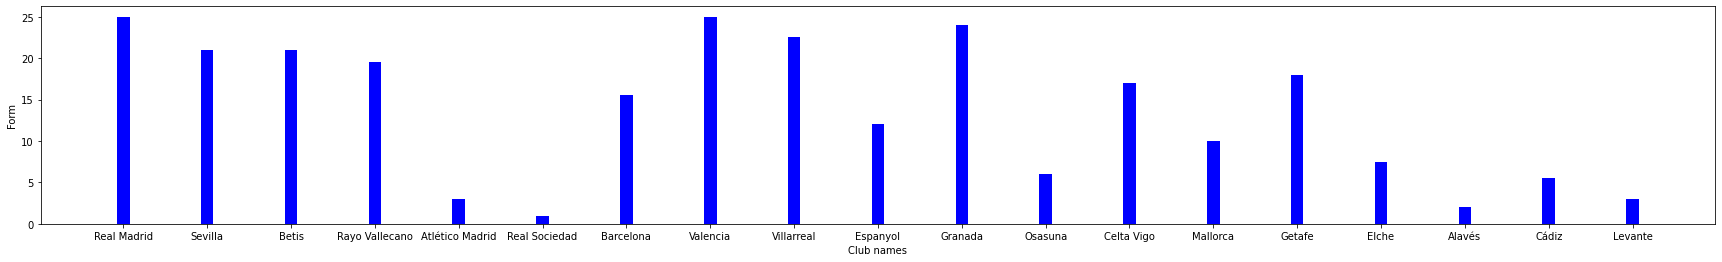

In [ ]:
x = df3['Squad']
y = df3['Form']
fig = plt.figure(figsize = (30, 4))
plt.xlabel('Club names')
plt.ylabel('Form')
plt.bar(x,y, color = 'blue', width = 0.15)
plt.show()

'Form' attribute individually might be a bit wague parameter, but when this is combined with other features like ranking in points table, difficulty of immediate games, injury situation of the squad etc., it could help to determine the probability of a team shooting upwards or descending downwards in point table (looks like an interesting machine learning task!). But as of now, we will proceed with the original task at hand without side-tracking! 

**Squad vs No. of wins/losses/draws plot:**

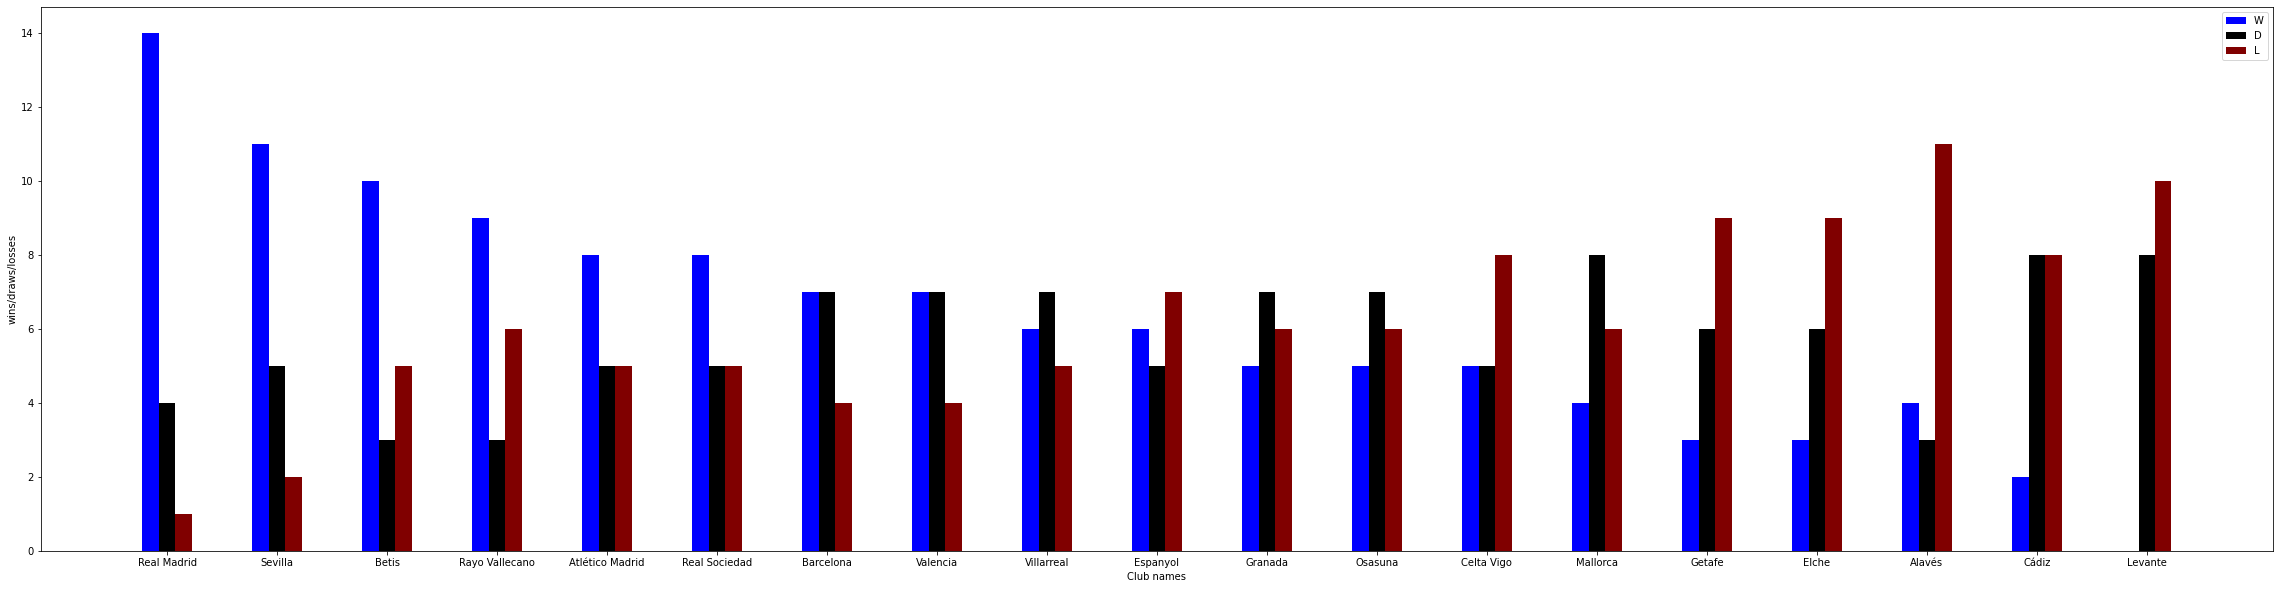

In [ ]:
df3['W'] = df3['W'].astype(int)
df3['L'] = df3['L'].astype(int)
df3['D'] = df3['D'].astype(int)
x = pd.Series(np.arange(19))

fig = plt.figure(figsize = (40, 10))
plt.xlabel('Club names')
plt.ylabel('wins/draws/losses')
plt.bar(x-0.15,df3['W'], color = 'blue', width = 0.15)
plt.bar(x, df3['D'], color = 'black', width = 0.15)
plt.bar(x+0.15, df3['L'],color = 'maroon', width = 0.15)
plt.xticks(x, df3['Squad'])
plt.legend(['W','D','L'])
plt.show()


Individual plots of number of wins or losses is a cliched plot these days, but plotting number of wins, losses and draws together might give some useful insight. 

**Squad vs No. of goals plot:**

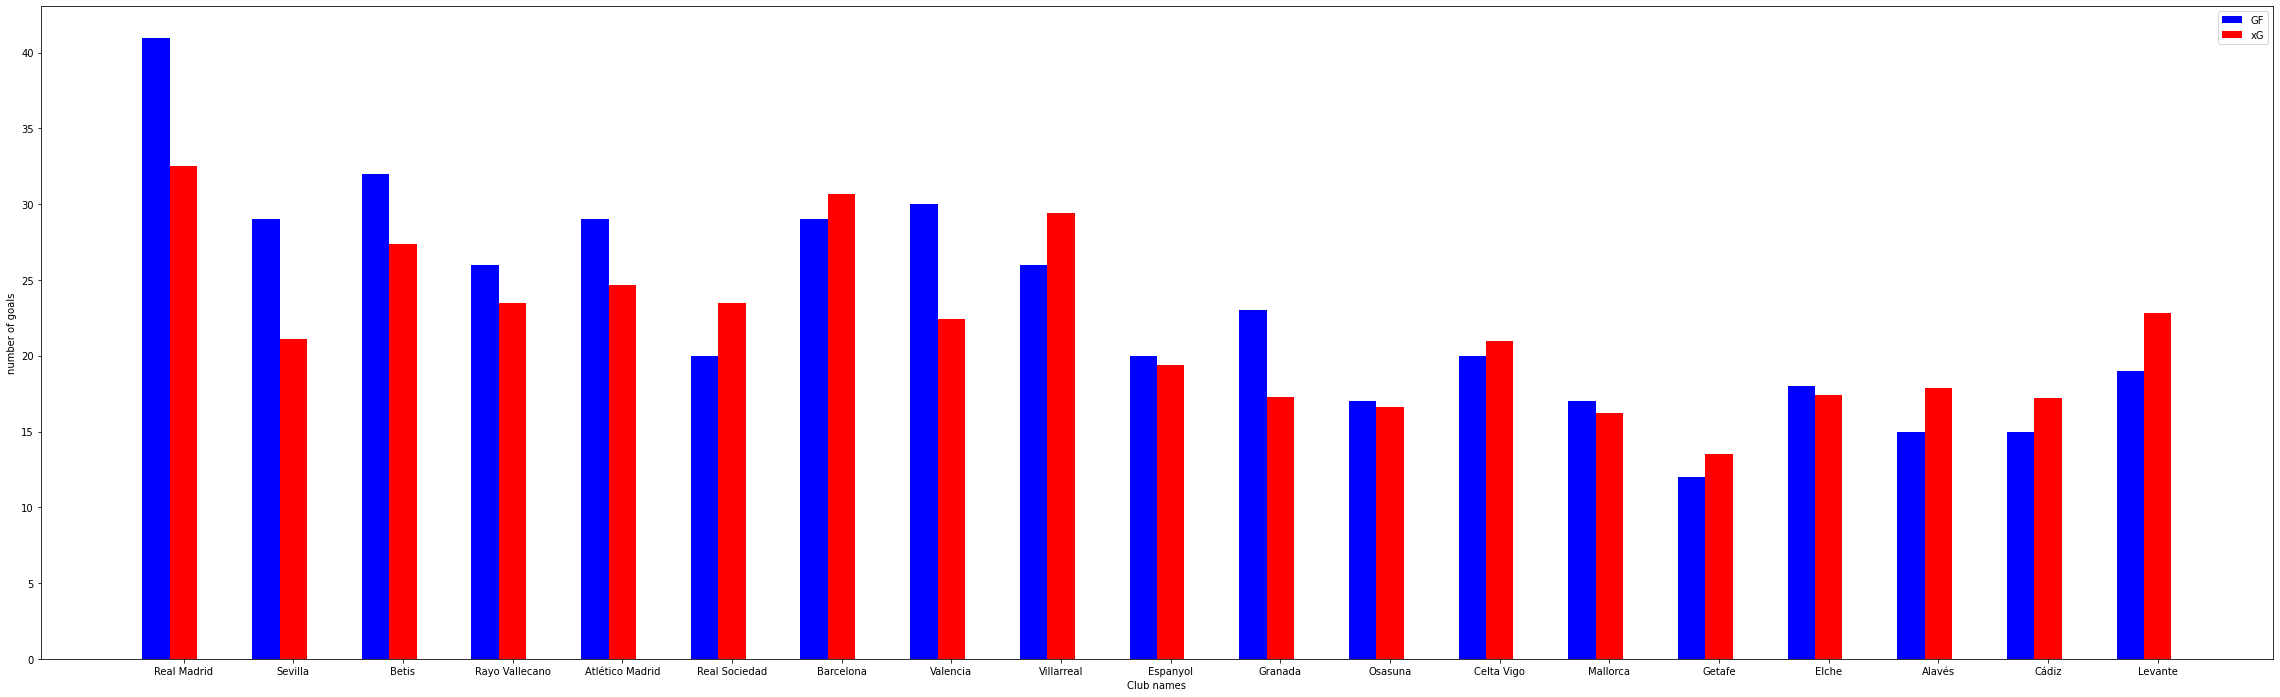

In [ ]:
df3['GF'] = df3['GF'].astype(float)
df3['xG'] = df3['xG'].astype(float)

x = pd.Series(np.arange(19))

fig = plt.figure(figsize = (40, 12))
plt.xlabel('Club names')
plt.ylabel('number of goals')
plt.bar(x-0.25,df3['GF'], color = 'blue', width = 0.25)
plt.bar(x, df3['xG'], color = 'red', width = 0.25)
plt.xticks(x, df3['Squad'])
plt.legend(['GF','xG'])
plt.show()


'xG' is a metric that evaluates the 'expected goals' of a team, where as 'GF' refers to the actual goals scored by a team. If a team outperforms its xG (i.e. GF > xG), then it indicates that they have good quality in attack and their strikers can convert even difficult chances into goals. 


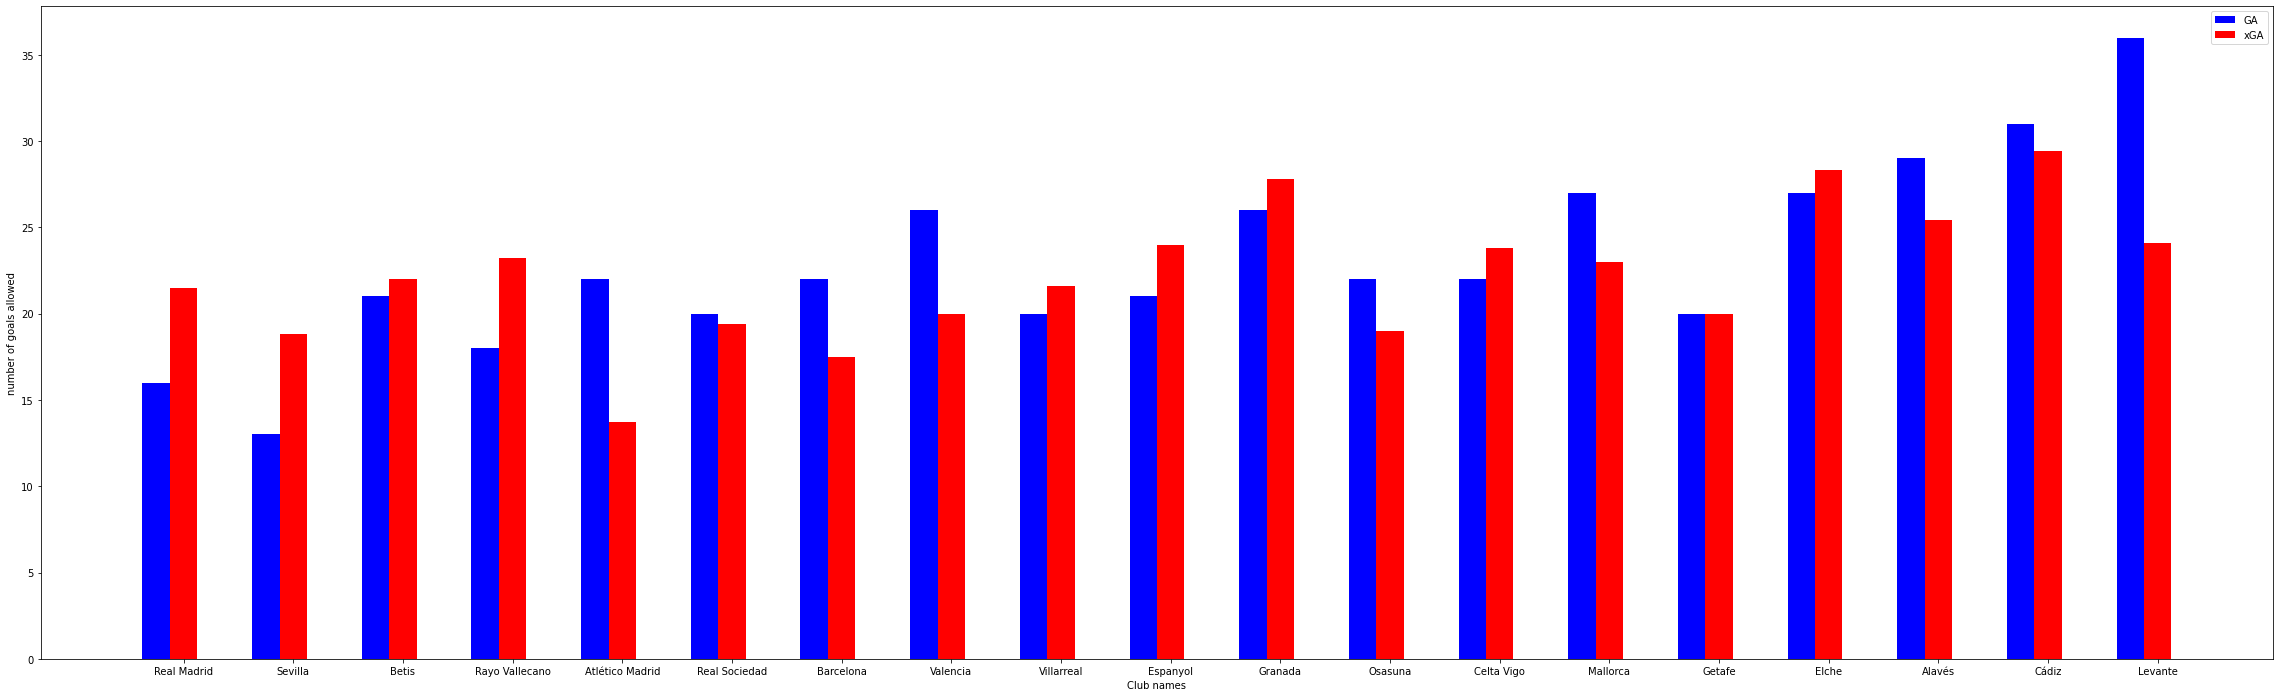

In [ ]:
df3['GA'] = df3['GA'].astype(float)
df3['xGA'] = df3['xGA'].astype(float)

x = pd.Series(np.arange(19))

fig = plt.figure(figsize = (40, 12))
plt.xlabel('Club names')
plt.ylabel('number of goals allowed')
plt.bar(x-0.25,df3['GA'], color = 'blue', width = 0.25)
plt.bar(x, df3['xGA'], color = 'red', width = 0.25)
plt.xticks(x, df3['Squad'])
plt.legend(['GA','xGA'])
plt.show()


'xGA' is a metric that evaluates a team's ability to restrict their opponent from scoring, it is also called as 'expected goals against'. 'GA' refers to the actual goals conceded by the team. A low xGA value will already suggest that a team is defending well, but if GA value is less than xGA, then it suggests the fact that the team has profited from the opponent's poor scoring instincts and this could also serve as a good measure for a team's luck (well, if an opponent striker some how misses an open goal opportunity, then this team must count themselves lucky, right?).


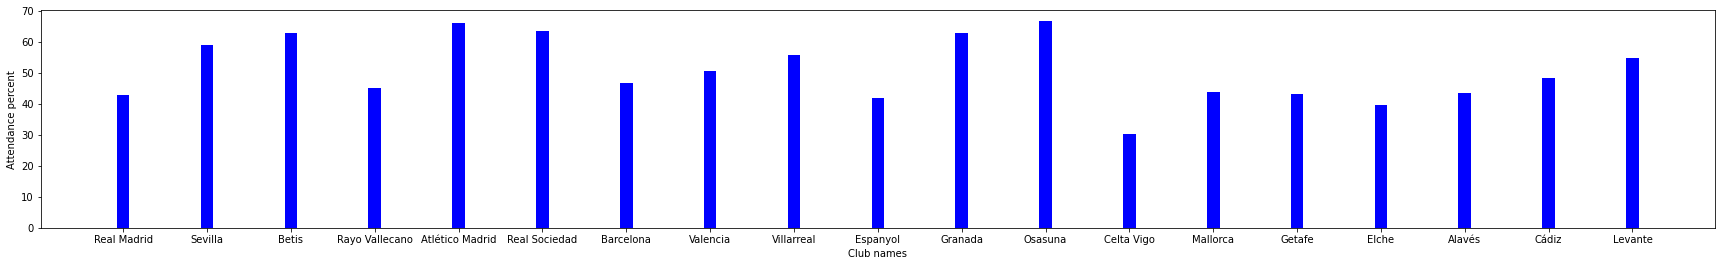

In [ ]:
x = df3['Squad']
y = df3['Attendance percent']
fig = plt.figure(figsize = (30, 4))
plt.xlabel('Club names')
plt.ylabel('Attendance percent')
plt.bar(x,y, color = 'blue', width = 0.15)
plt.show()

Attendance percentages are not a reliable stat to look at, due to the fact that there are several COVID related guidelines in place on large gatherings and moreover, Real Madrid's iconic Santiago Bernabeau stadium is undergoing renovation, which partly explains the reason why Los Blancos have less attendance percentage compared to other teams at top.

In [ ]:
def bar_plot(i): #defining a function to generalize creation of bar plots
    x = df3['Squad']
    y = df3[i]
    fig = plt.figure(figsize = (28,4))
    plt.xlabel('Club names')
    plt.ylabel(i)
    plt.bar(x,y, color = 'blue', width = 0.15)
    plt.show()

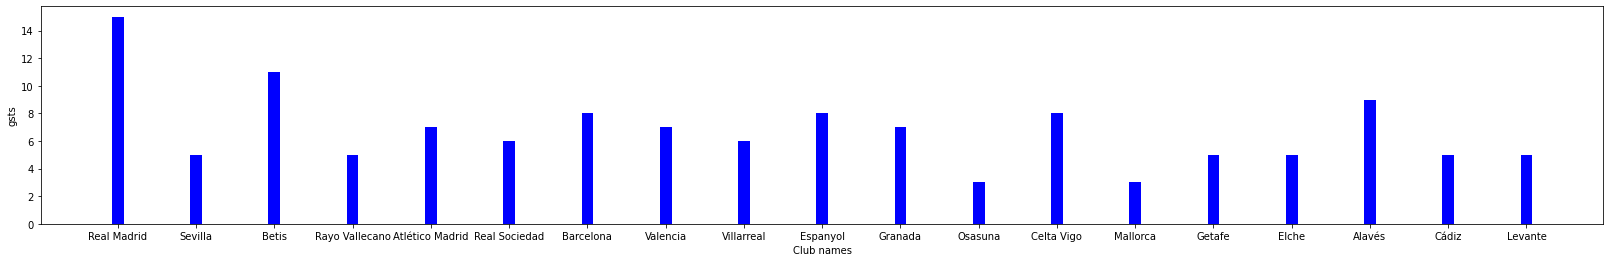

In [ ]:
df3['gsts'] = df3['gsts'].astype(int)
bar_plot('gsts')

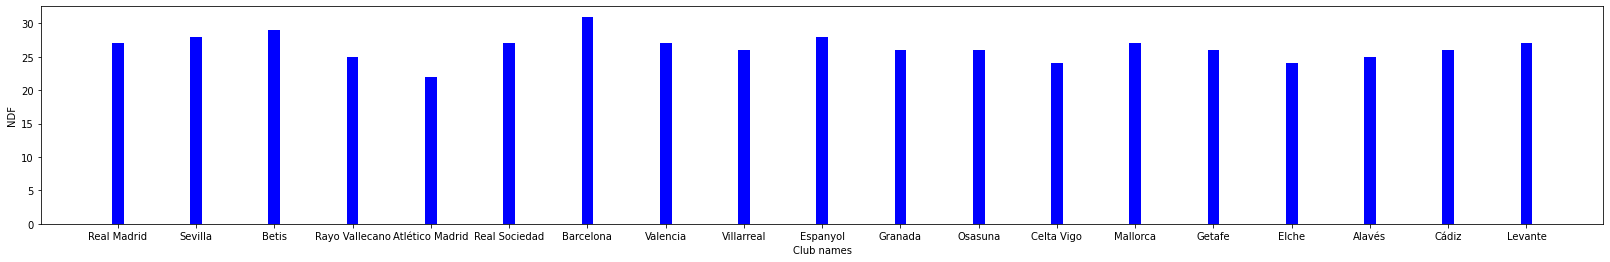

In [ ]:
df3['NDF'] = df3['NDF'].astype(int)
bar_plot('NDF')



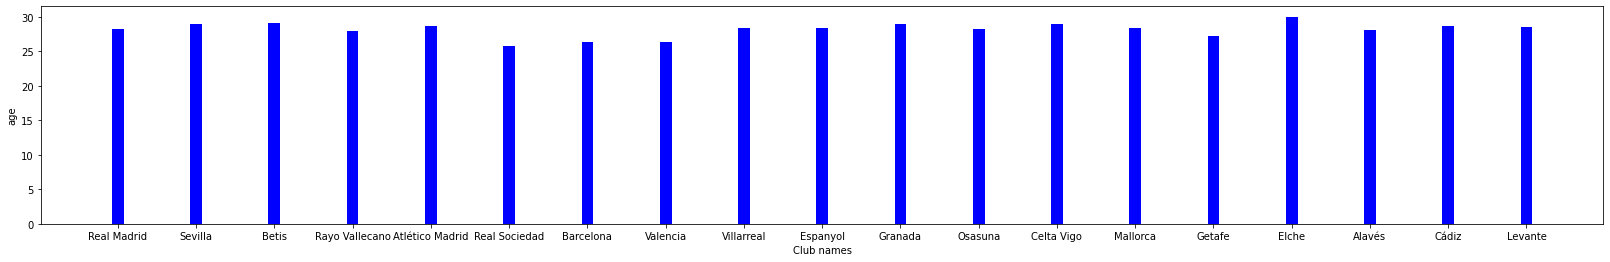

In [ ]:
df3['age'] = df3['age'].astype(float)
bar_plot('age')


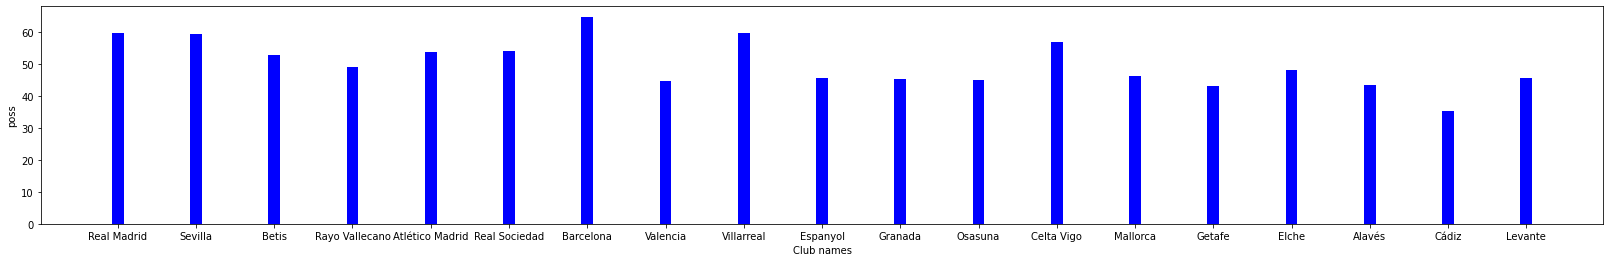

In [ ]:
df3['poss'] = df3['poss'].astype(float)
bar_plot('poss')


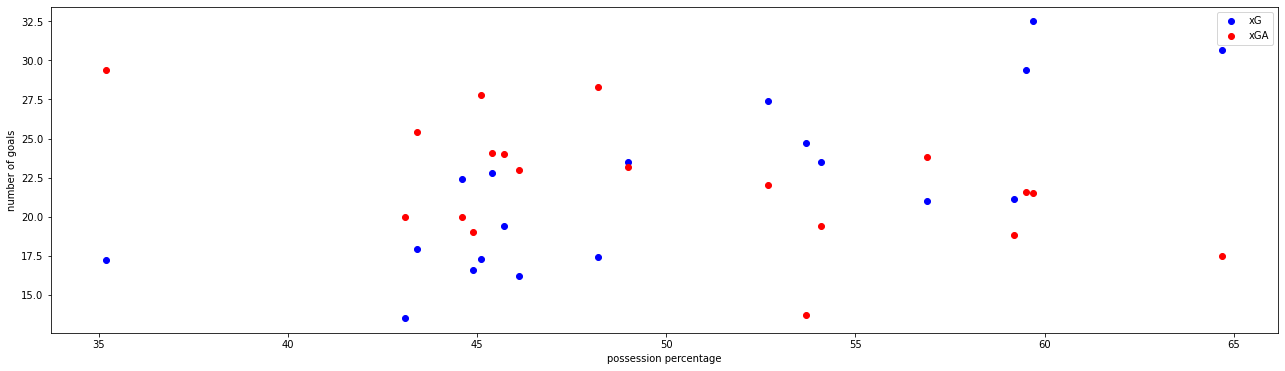

In [ ]:
x = df3['poss']
y1 = df3['xG']
y2 = df3['xGA']

fig = plt.figure(figsize = (22,6))
plt.scatter(x,y1, color = 'blue')
plt.scatter(x,y2, color = 'red')

plt.xlabel('possession percentage')
plt.ylabel('number of goals')
plt.legend(['xG','xGA'])
plt.show()

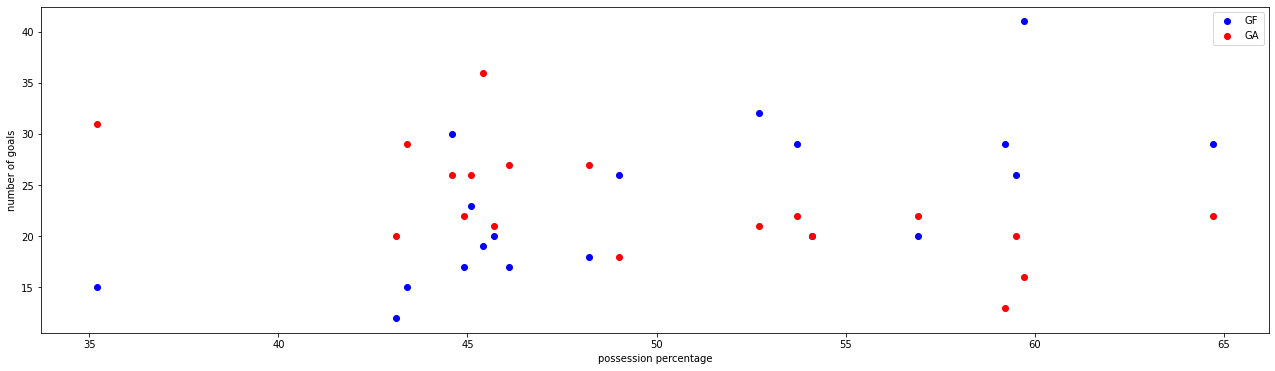

In [ ]:
x = df3['poss']
y1 = df3['GF']
y2 = df3['GA']

fig = plt.figure(figsize = (22,6))
plt.scatter(x,y1, color = 'blue')
plt.scatter(x,y2, color = 'red')

plt.xlabel('possession percentage')
plt.ylabel('number of goals')
plt.legend(['GF','GA'])
plt.show()

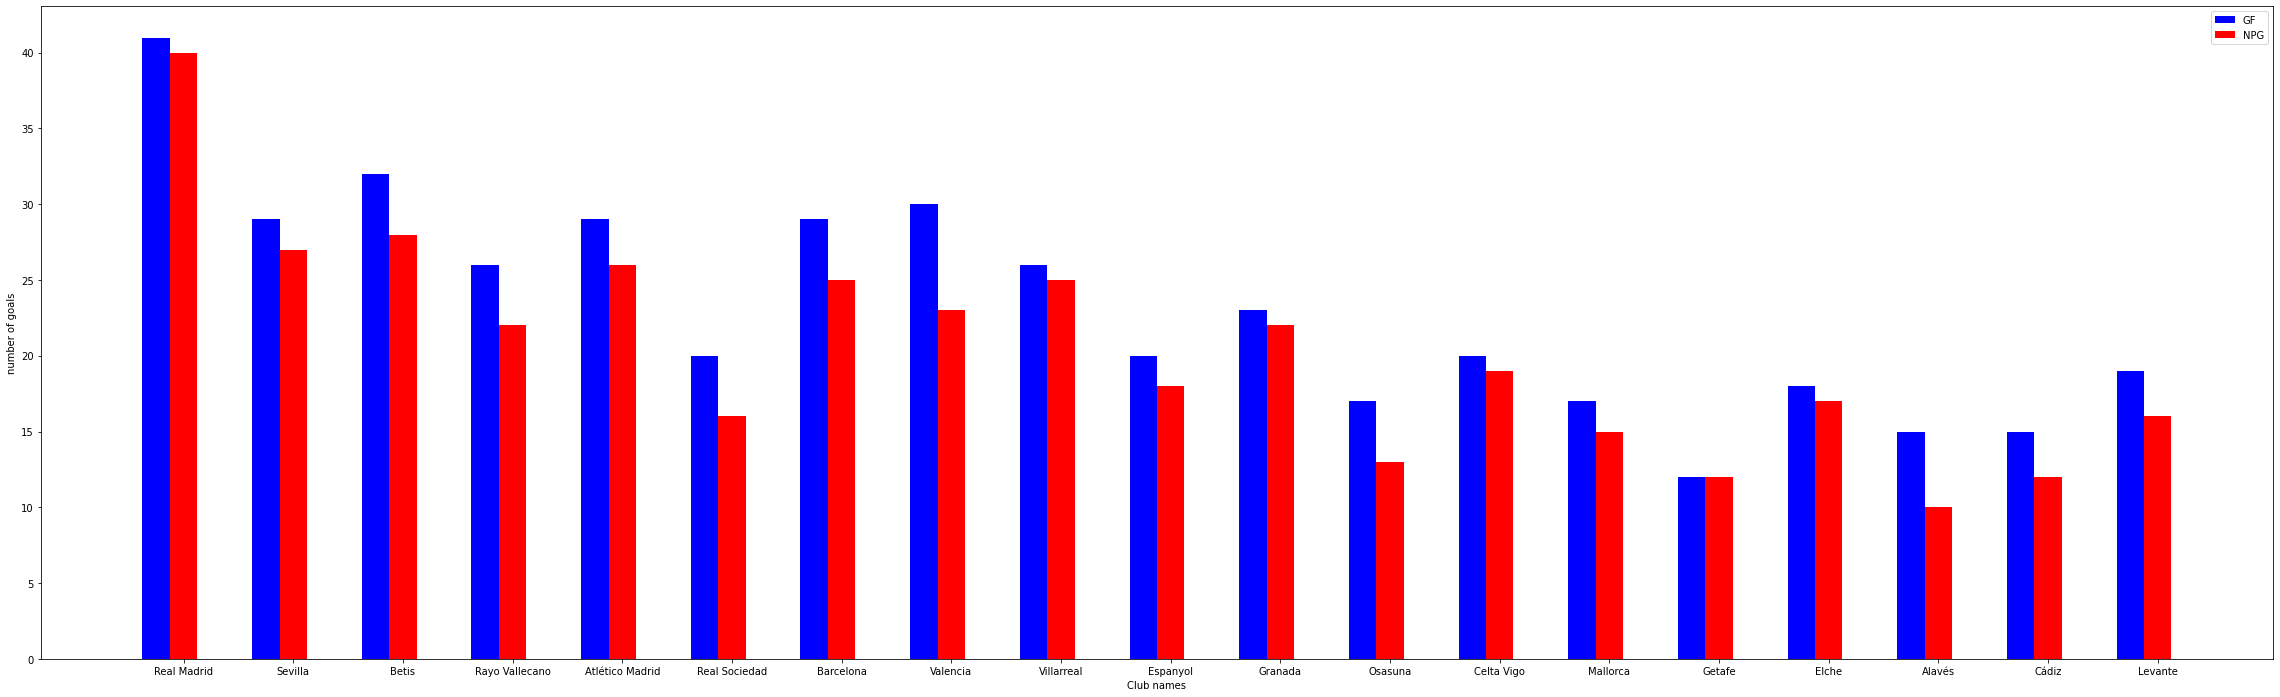

In [ ]:
df3['GF'] = df3['GF'].astype(float)
df3['NPG'] = df3['NPG'].astype(float)

x = pd.Series(np.arange(19))

fig = plt.figure(figsize = (40, 12))
plt.xlabel('Club names')
plt.ylabel('number of goals')
plt.bar(x-0.25,df3['GF'], color = 'blue', width = 0.25)
plt.bar(x, df3['NPG'], color = 'red', width = 0.25)
plt.xticks(x, df3['Squad'])
plt.legend(['GF','NPG'])
plt.show()

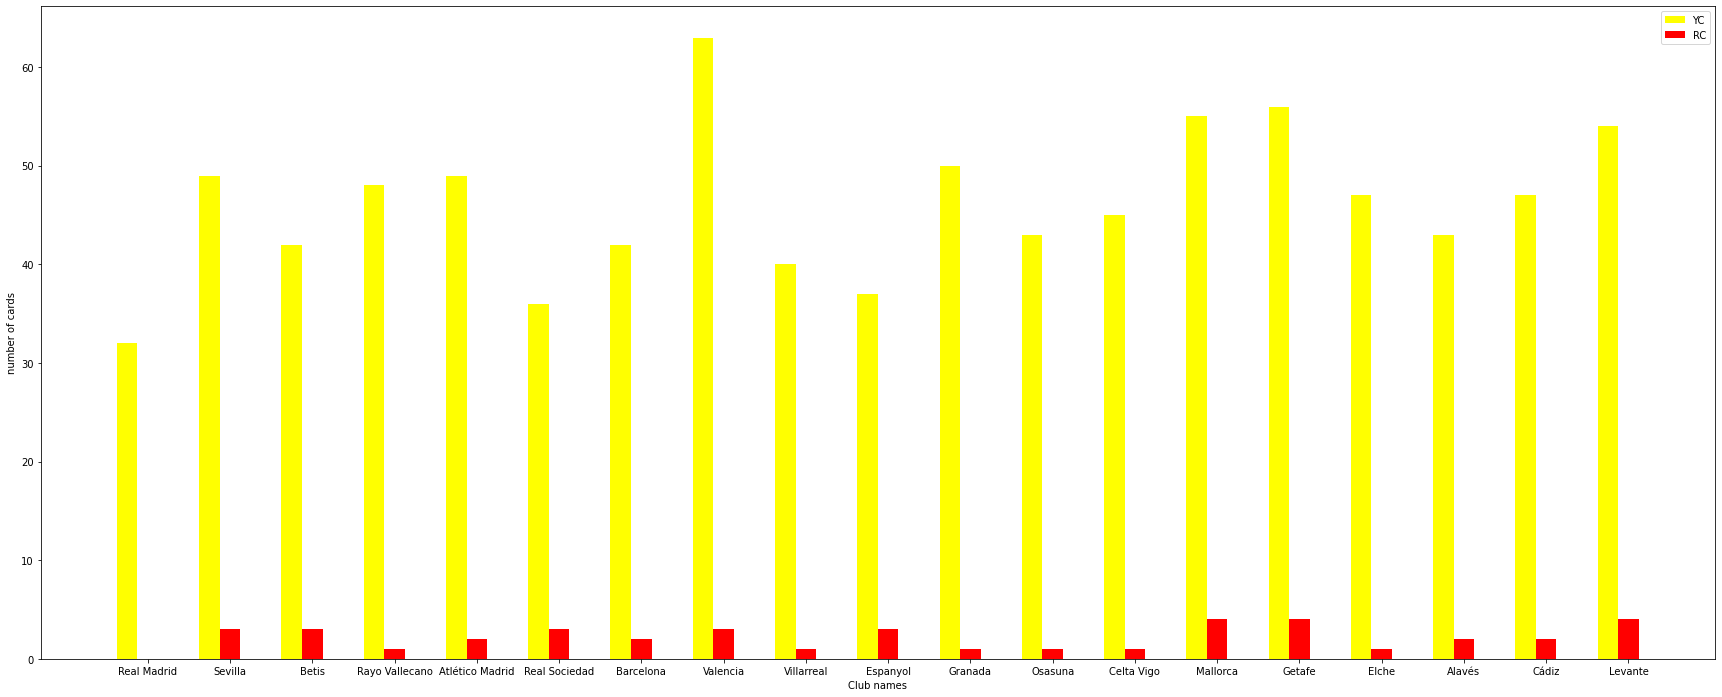

In [ ]:
df3['YC'] = df3['YC'].astype(float)
df3['RC'] = df3['RC'].astype(float)

x = pd.Series(np.arange(19))

fig = plt.figure(figsize = (30, 12))
plt.xlabel('Club names')
plt.ylabel('number of cards')
plt.bar(x-0.25,df3['YC'], color = 'yellow', width = 0.25)
plt.bar(x, df3['RC'], color = 'red', width = 0.25)
plt.xticks(x, df3['Squad'])
plt.legend(['YC','RC'])
plt.show()

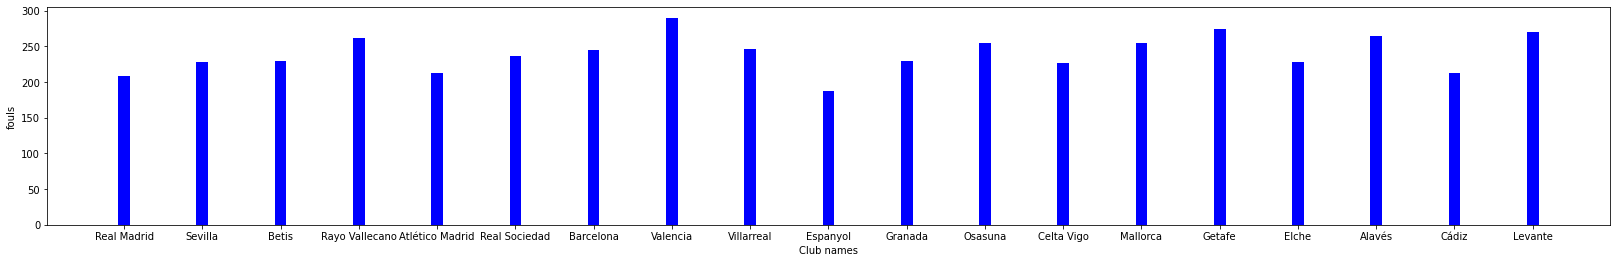

In [ ]:
df3['fouls'] = df3['fouls'].astype(float)
bar_plot('fouls')


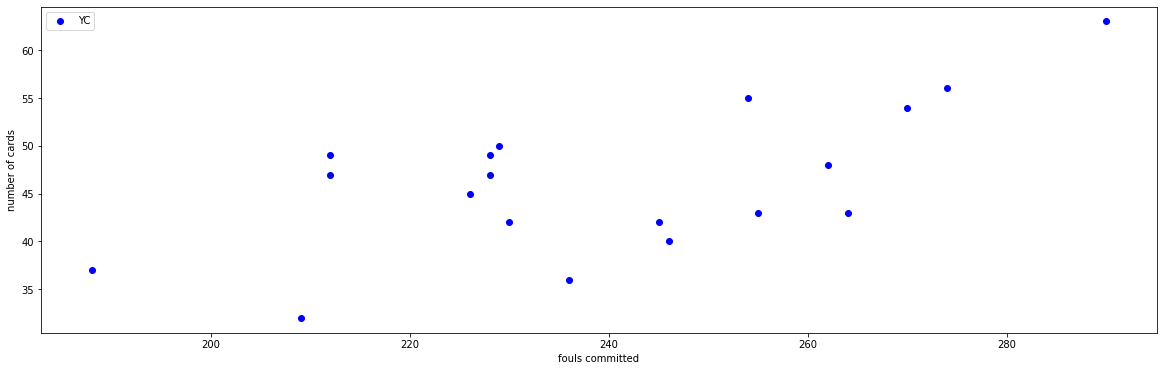

In [ ]:
x = df3['fouls']
y1 = df3['YC']


fig = plt.figure(figsize = (20,6))
plt.scatter(x,y1, color = 'blue')


plt.xlabel('fouls committed')
plt.ylabel('number of cards')
plt.legend(['YC'])
plt.show()

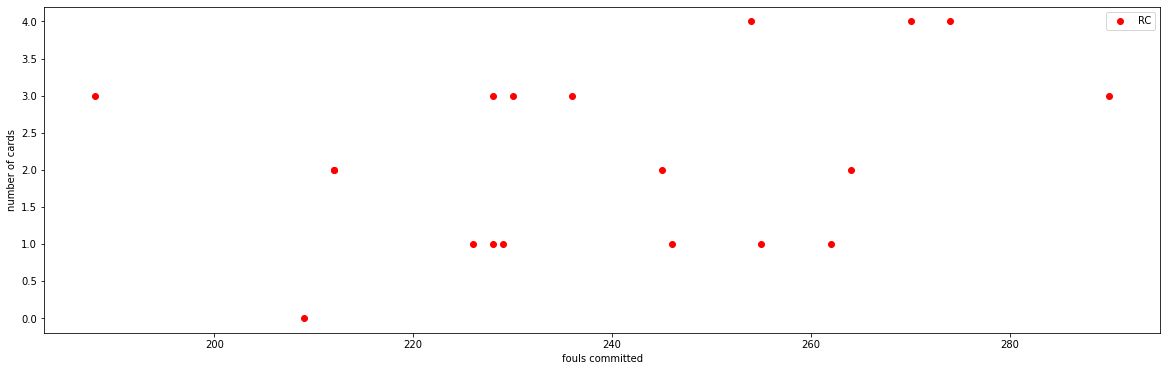

In [ ]:
x = df3['fouls']
y2 = df3['RC']

fig = plt.figure(figsize = (20,6))

plt.scatter(x,y2, color = 'red')

plt.xlabel('fouls committed')
plt.ylabel('number of cards')
plt.legend(['RC'])
plt.show()

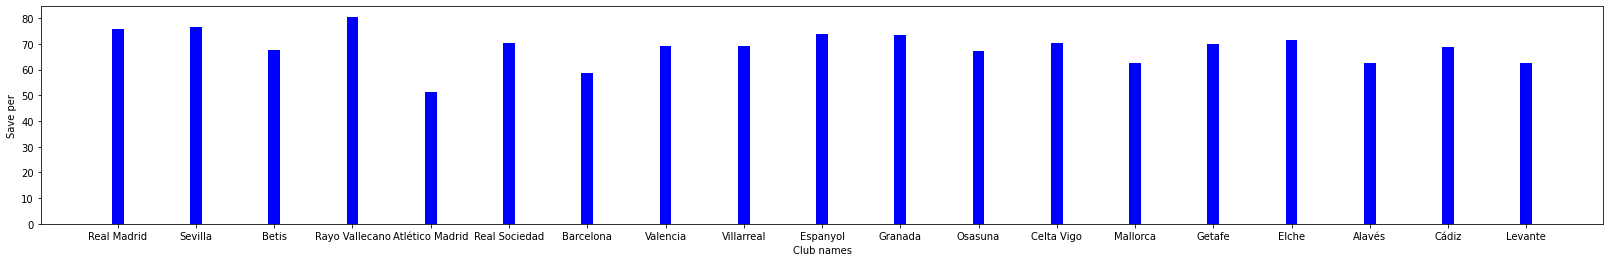

In [ ]:
df3['Save per'] = df3['Save per'].astype(float)
bar_plot('Save per')

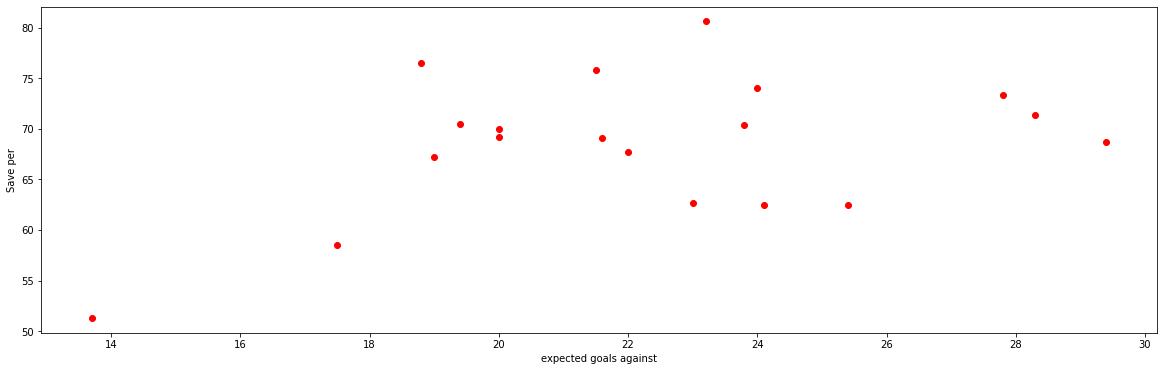

In [ ]:
x = df3['xGA']
y2 = df3['Save per']

fig = plt.figure(figsize = (20,6))

plt.scatter(x,y2, color = 'red')

plt.xlabel('expected goals against')
plt.ylabel('Save per')

plt.show()

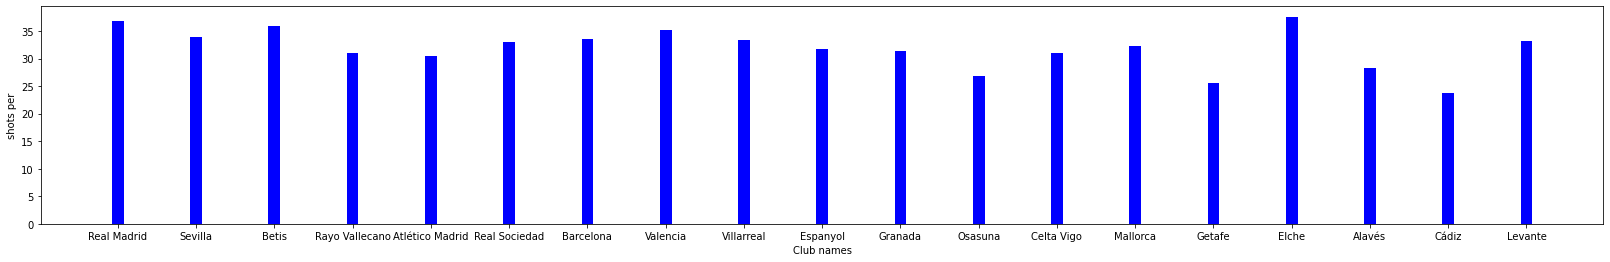

In [ ]:
df3['shots per'] = df3['shots per'].astype(float)
bar_plot('shots per')

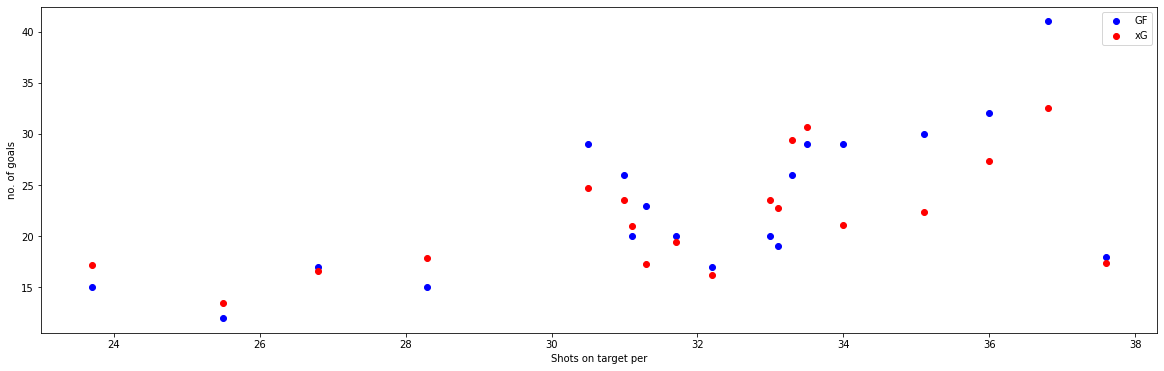

In [ ]:
x = df3['shots per']
y1 = df3['GF']
y2 = df3['xG']

fig = plt.figure(figsize = (20,6))
plt.scatter(x,y1, color = 'blue')
plt.scatter(x,y2, color = 'red')
plt.xlabel('Shots on target per')
plt.ylabel('no. of goals')
plt.legend(['GF','xG'])

plt.show()

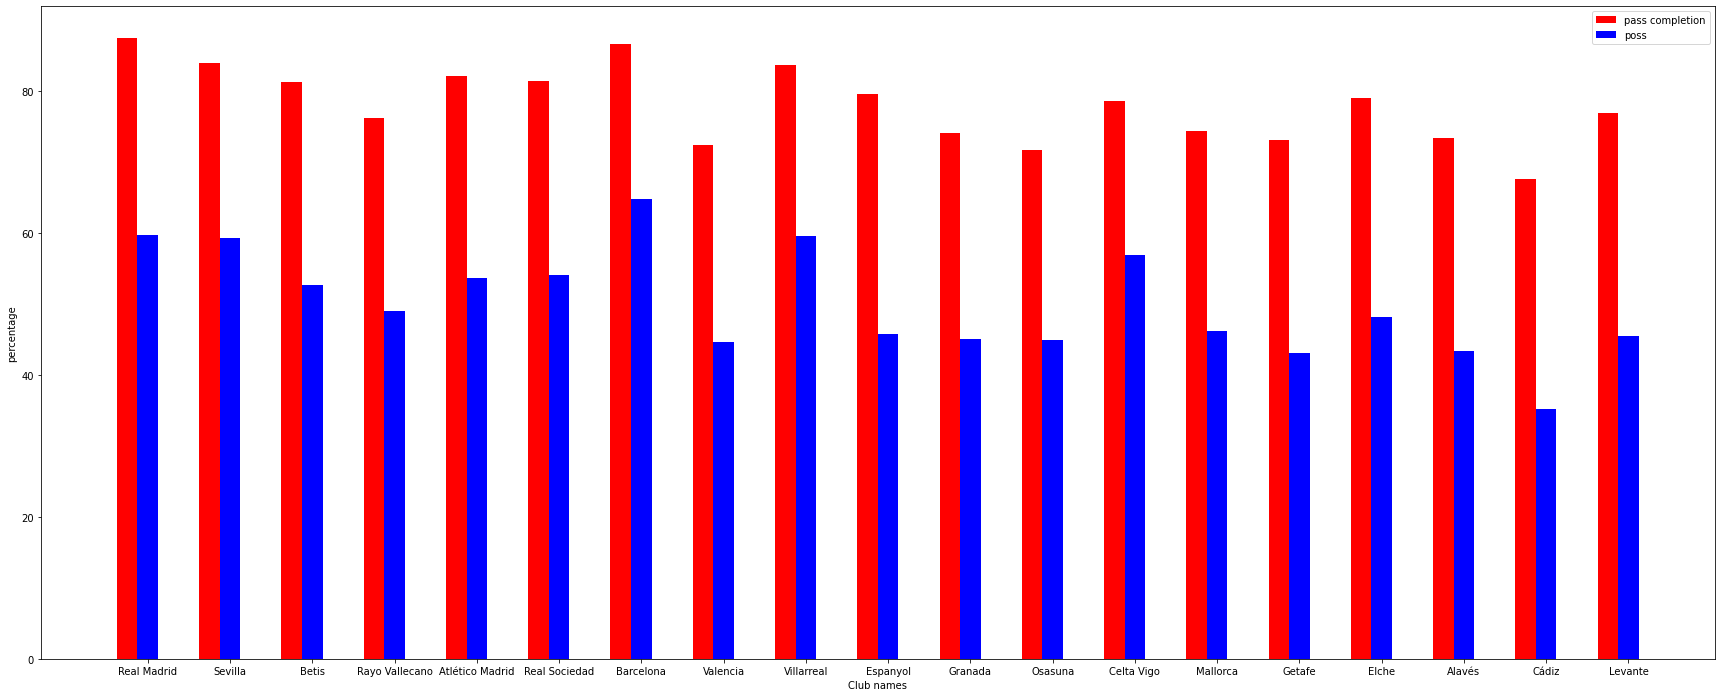

In [ ]:
df3['pass completion'] = df3['pass completion'].astype(float)
df3['poss'] = df3['poss'].astype(float)

x = pd.Series(np.arange(19))

fig = plt.figure(figsize = (30, 12))
plt.xlabel('Club names')
plt.ylabel('percentage')
plt.bar(x-0.25,df3['pass completion'], color = 'red', width = 0.25)
plt.bar(x, df3['poss'], color = 'blue', width = 0.25)
plt.xticks(x, df3['Squad'])
plt.legend(['pass completion','poss'])
plt.show()

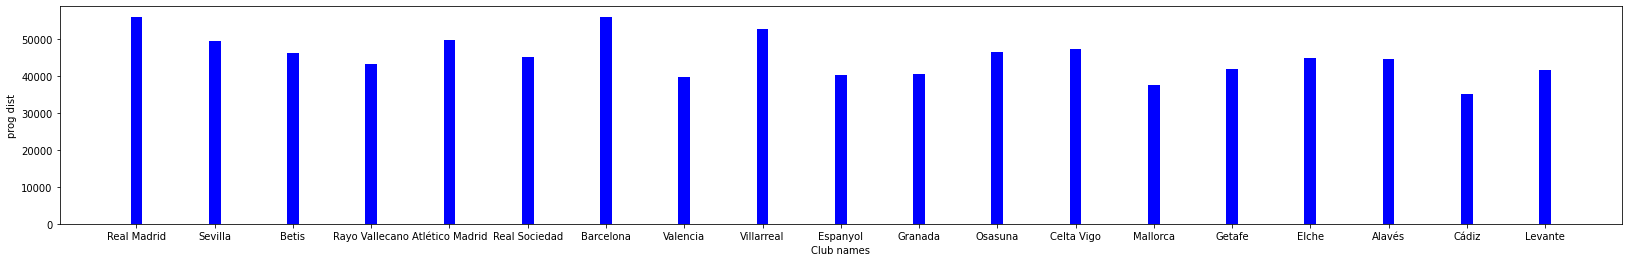

In [ ]:
df3['prog dist'] = df3['prog dist'].astype(float)
bar_plot('prog dist')

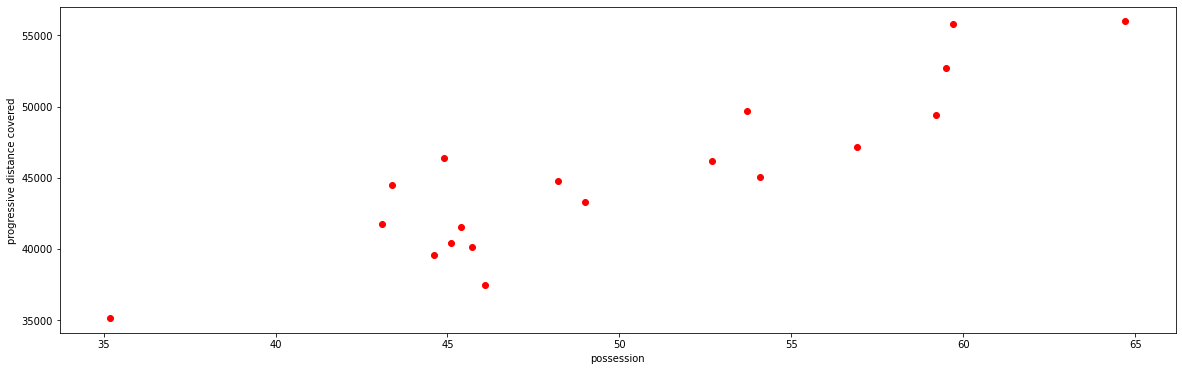

In [ ]:
x = df3['poss']
y2 = df3['prog dist']

fig = plt.figure(figsize = (20,6))

plt.scatter(x,y2, color = 'red')

plt.xlabel('possession')
plt.ylabel('progressive distance covered')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


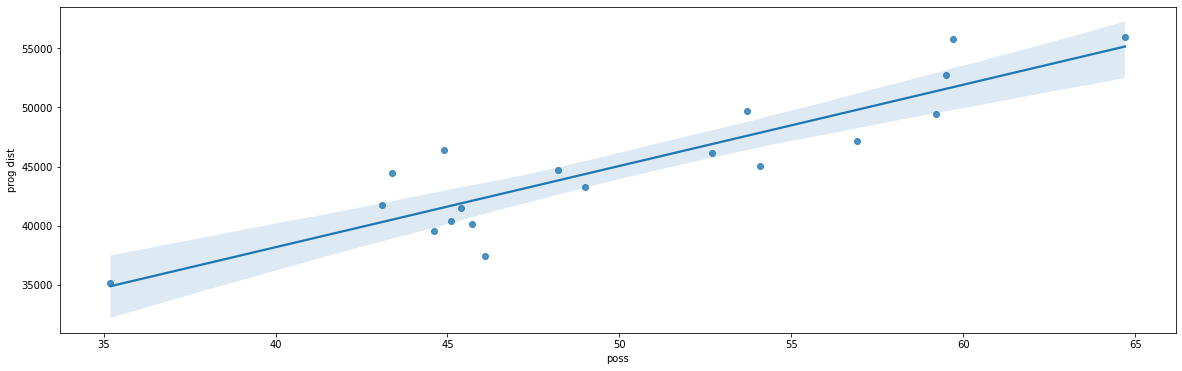

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (20,6))
sns.regplot(x,y2)
plt.show()

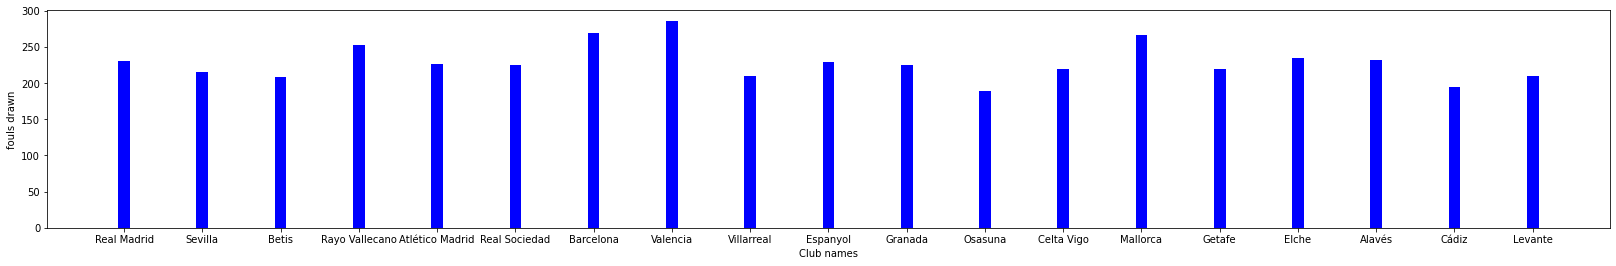

In [ ]:
df3['fouls drawn'] = df3['fouls drawn'].astype(float)
bar_plot('fouls drawn')

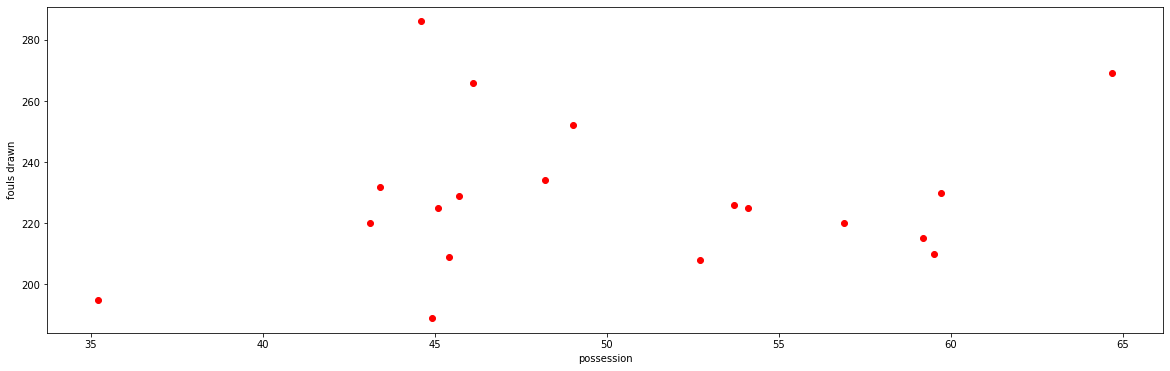

In [ ]:
x = df3['poss']
y2 = df3['fouls drawn']

fig = plt.figure(figsize = (20,6))

plt.scatter(x,y2, color = 'red')

plt.xlabel('possession')
plt.ylabel('fouls drawn')

plt.show()

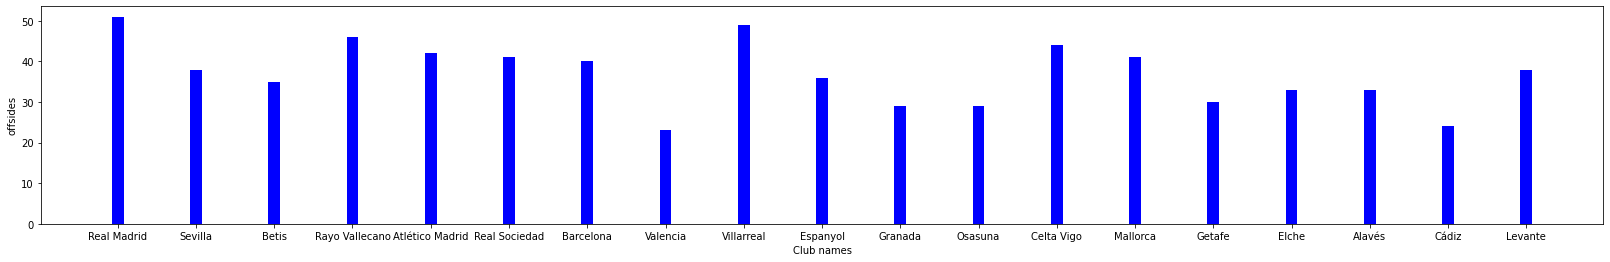

In [ ]:
df3['offsides'] = df3['offsides'].astype(float)
bar_plot('offsides')

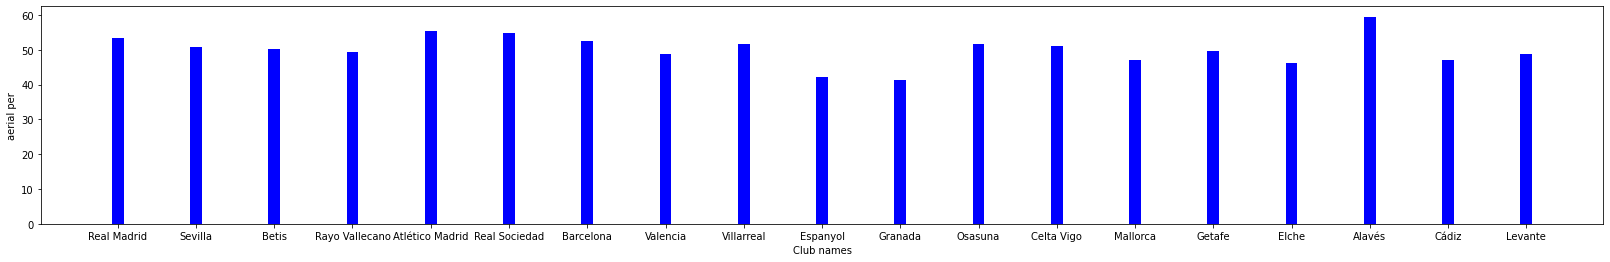

In [ ]:
df3['aerial per'] = df3['aerial per'].astype(float)
bar_plot('aerial per')

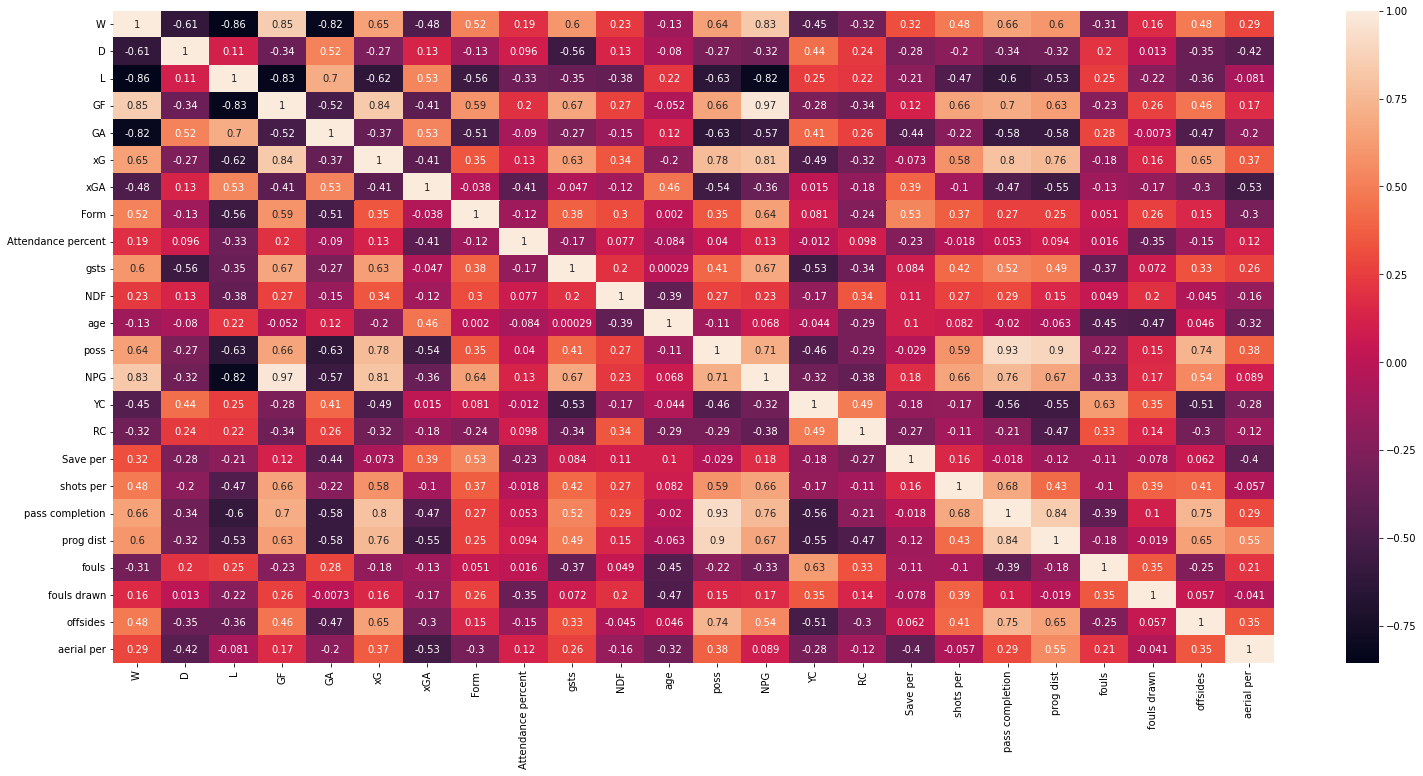

In [ ]:
import seaborn as sns
corr = df3.corr()
fig = plt.figure(figsize = (26, 12))

sns.heatmap(corr, annot = True)
plt.show()